# PageRank Strategy Analysis (Before vs After)

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive mounted successfully!
Loading original graph...
Original graph: 122066 edges, 1841 pages
✅ Loaded from: /content/drive/MyDrive/WebKnoGraph/initial_thoughts/link_graph_edges.csv
🎓 Starting academic metrics analysis...
Scanning strategy folders in: /content/drive/MyDrive/WebKnoGraph/initial_thoughts/automatic_led
Looking for folders: best_batches, worst_batches, folder_batches, mixed_batches, random_batches

📁 Processing strategy folder: best_batches
Found 10 CSV files in best_batches
  Processing 1/10: 240_best_updated_link_graph_edges_1.csv
    ✅ Kendall τ: 0.971, JS Distance: 0.0260
  Processing 2/10: 240_best_updated_link_graph_edges_2.csv
    ✅ Kendall τ: 0.970, JS Distance: 0.0263
  Processing 3/10: 240_best_updated_link_graph_edges_3.csv
    ✅ Kendall τ: 0.974, JS Distance: 0.0226
  Processing 4/10: 240_best_update

/tmp/ipython-input-3412416577.py:505: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax4.boxplot(rbo_data, labels=rbo_labels, patch_artist=True)



📋 Generating academic analysis report...

🎓 ACADEMIC METRICS: PageRank Strategy Analysis Report

📊 ANALYSIS SUMMARY:
   • Total strategies analyzed: 50 files across 5 batch types
   • Batch types: best_batches, worst_batches, folder_batches, mixed_batches, random_batches

📈 OVERALL ACADEMIC METRICS:
   • Mean Kendall's τ: 0.9561 (±0.0087)
   • Mean Spearman's ρ: 0.9723 (±0.0061)
   • Mean Pearson's r: 0.9991 (±0.0005)
   • Mean Jensen-Shannon Distance: 0.0413 (±0.0085)
   • Mean RBO: 0.5420 (±0.2713)

🏆 BATCH STRATEGY RANKINGS (Academic Metrics):

#1 - 🎓 RANDOM_BATCHES BATCH STRATEGY
   📁 Files analyzed: 10
   🏆 Rank Preservation Score: 0.9730

   📊 CORRELATION METRICS:
      • Kendall's τ: 0.9619 ± 0.0019
      • Spearman's ρ: 0.9706 ± 0.0035
      • Pearson's r: 0.9983 ± 0.0001

   📏 DISTANCE METRICS:
      • Jensen-Shannon Distance: 0.0513 ± 0.0006
      • MAE: 0.000000 ± 0.000000
      • RMSE: 0.000100 ± 0.000000

   🎯 RANKING METRICS:
      • Rank-Biased Overlap: 0.9998 ± 0.0000


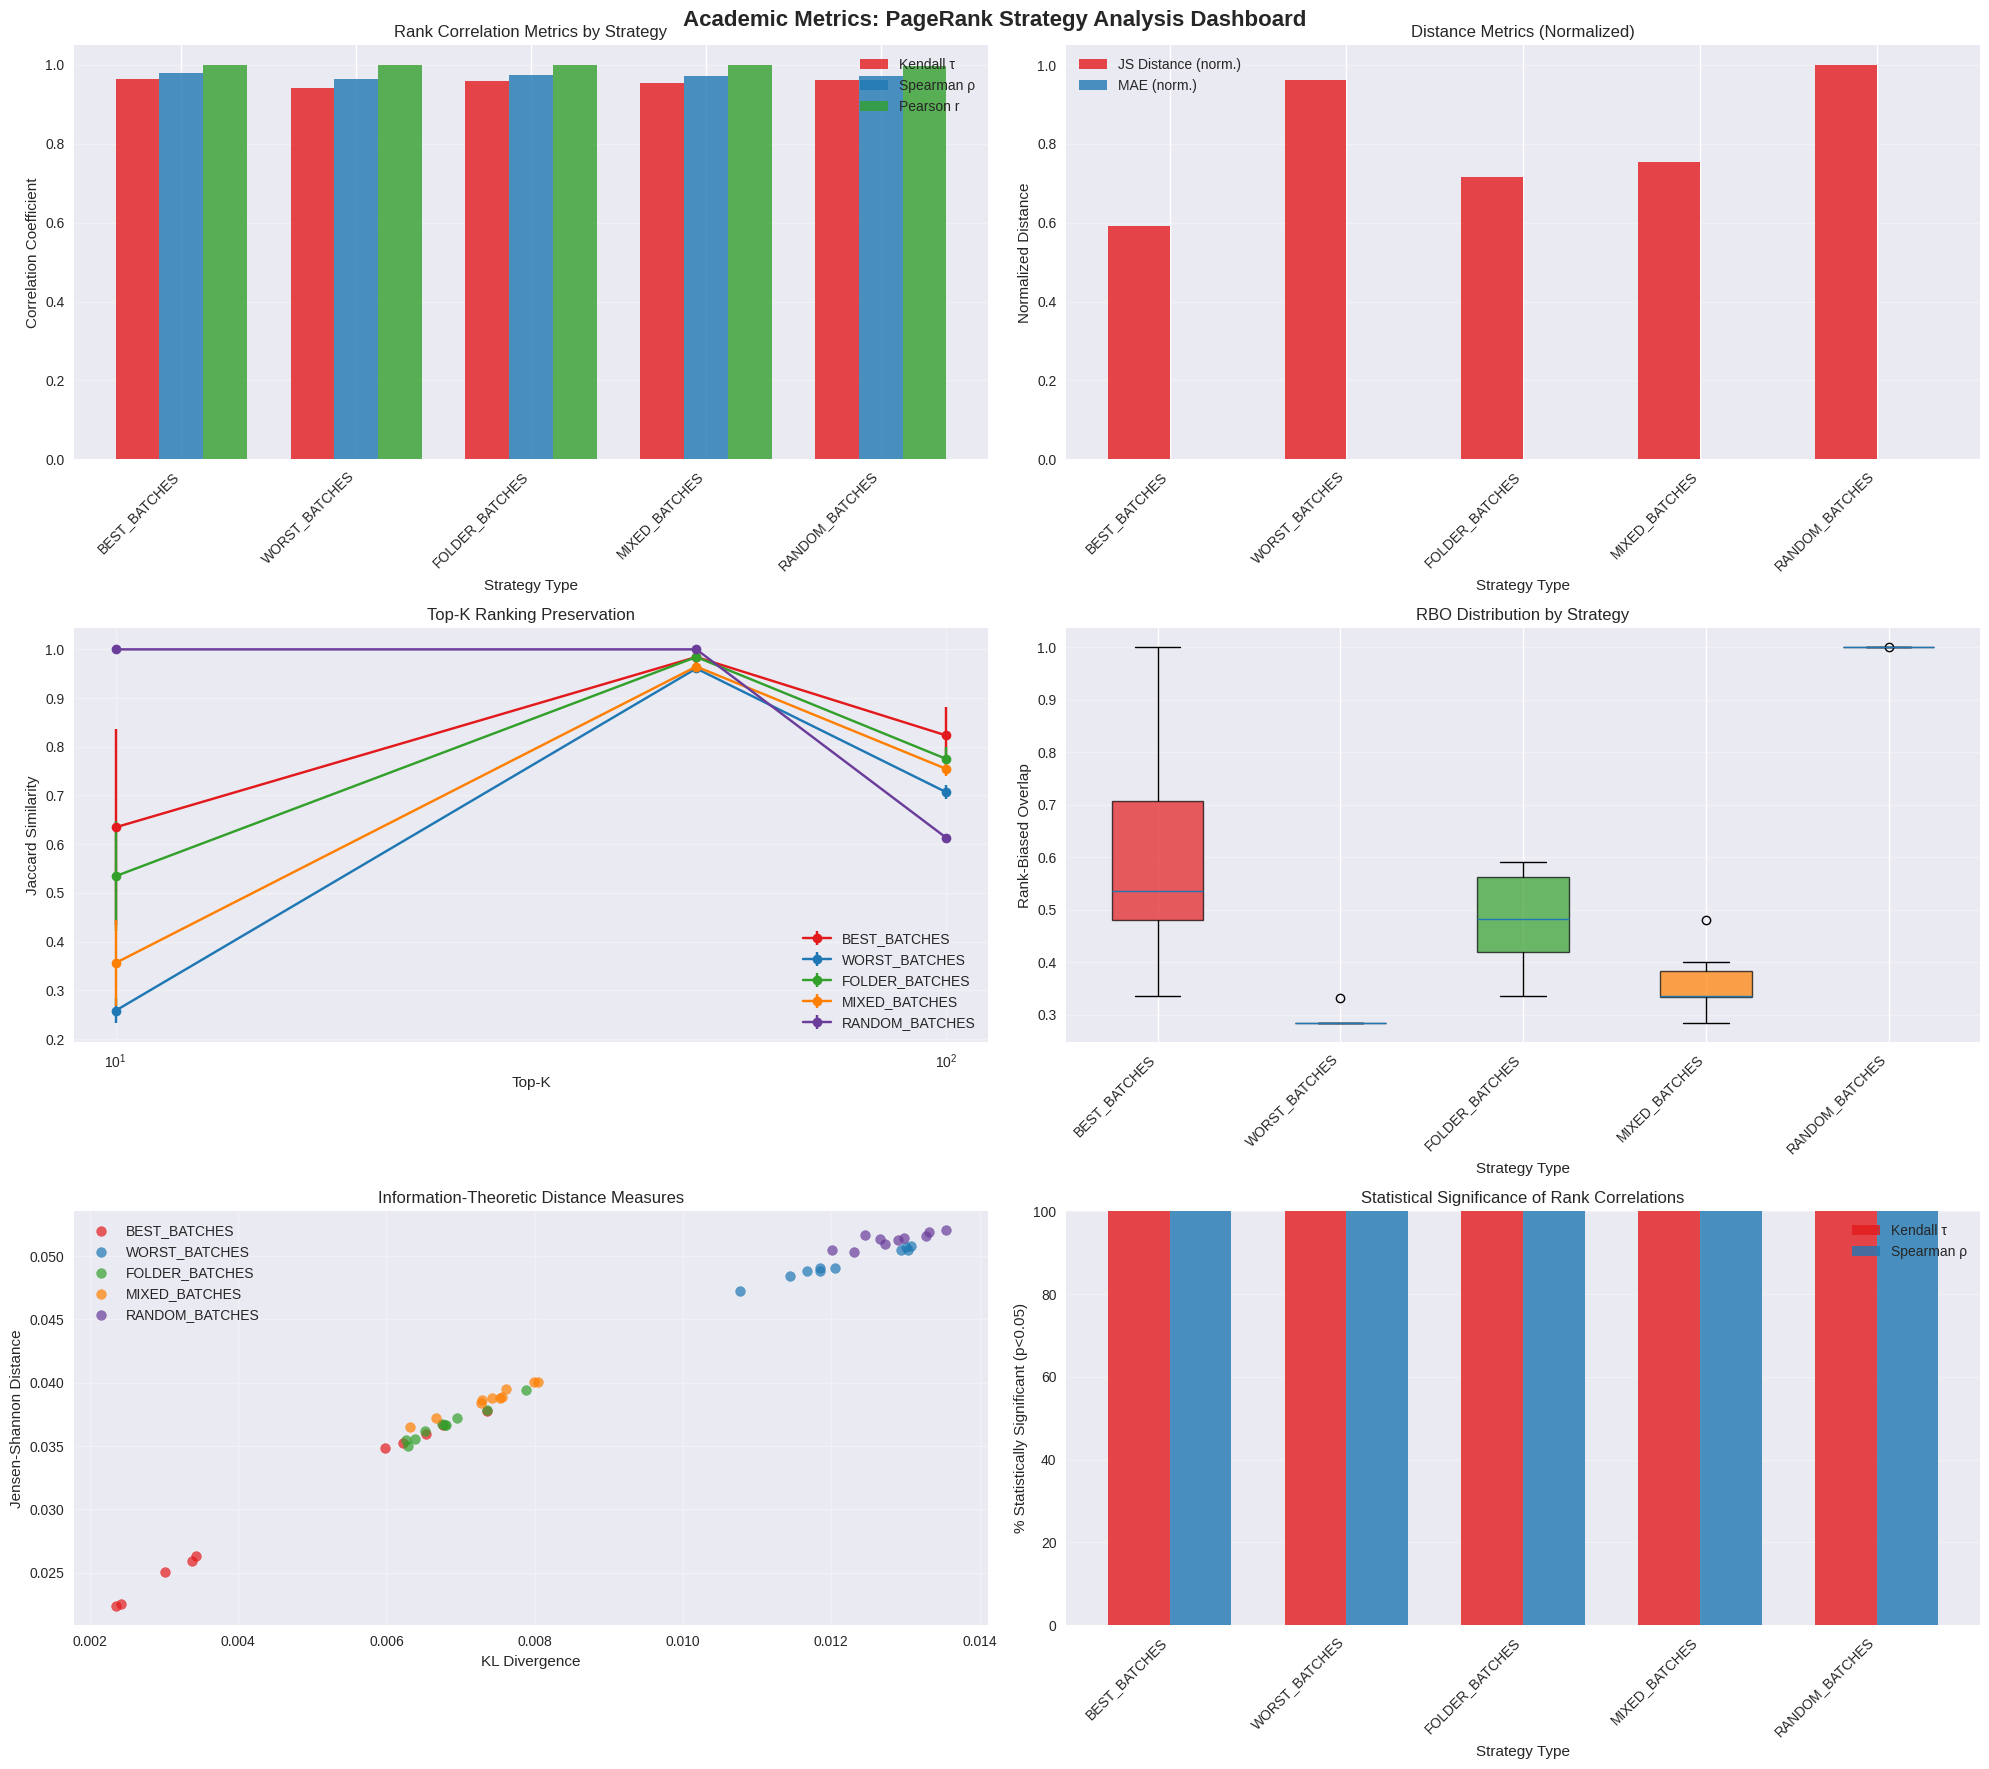


🎉 ACADEMIC ANALYSIS COMPLETE!
📊 Best strategy by rank preservation: RANDOM_BATCHES
📈 Kendall's τ = 0.9619


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.spatial.distance import jensenshannon
import os
from datetime import datetime
import json
from google.colab import drive

# Try to import wasserstein_distance, if not available, we'll implement it
try:
    from scipy.stats import wasserstein_distance
except ImportError:
    # Implement a simple version of Wasserstein distance
    def wasserstein_distance(u_values, v_values):
        """Simple implementation of 1D Wasserstein distance"""
        u_values = np.asarray(u_values)
        v_values = np.asarray(v_values)

        # Sort the values
        u_sorted = np.sort(u_values)
        v_sorted = np.sort(v_values)

        # Make them the same length by padding with zeros
        max_len = max(len(u_sorted), len(v_sorted))
        u_padded = np.pad(u_sorted, (0, max_len - len(u_sorted)), "constant")
        v_padded = np.pad(v_sorted, (0, max_len - len(v_sorted)), "constant")

        # Calculate the Wasserstein distance
        return np.mean(np.abs(u_padded - v_padded))


# Set style for better plots
plt.style.use("seaborn-v0_8")
contrast_colors = ["#E31A1C", "#1F78B4", "#33A02C", "#FF7F00", "#6A3D9A", "#B15928"]
sns.set_palette(contrast_colors)


class AcademicPageRankAnalyzer:
    def __init__(self, original_file_path):
        self.original_file_path = original_file_path
        self.original_pr = None
        self.original_graph = None
        self.results = []
        self.base_drive_path = (
            "/content/drive/MyDrive/WebKnoGraph/initial_thoughts/automatic_led"
        )
        self.strategy_folders = [
            "best_batches",
            "worst_batches",
            "folder_batches",
            "mixed_batches",
            "random_batches",
        ]

        # Mount Google Drive
        self.mount_drive()
        self.load_original_graph()

    def mount_drive(self):
        """Mount Google Drive"""
        print("Mounting Google Drive...")
        drive.mount("/content/drive")
        print("✅ Google Drive mounted successfully!")

    def load_original_graph(self):
        """Load and calculate PageRank for the original graph"""
        print("Loading original graph...")

        original_file_path = (
            "/content/drive/MyDrive/WebKnoGraph/initial_thoughts/link_graph_edges.csv"
        )

        possible_paths = [
            original_file_path,
            f"/content/drive/MyDrive/WebKnoGraph/{self.original_file_path}",
            f"/content/drive/MyDrive/{self.original_file_path}",
            os.path.join(self.base_drive_path, self.original_file_path),
        ]

        full_path = None
        for path in possible_paths:
            if os.path.exists(path):
                full_path = path
                break

        if full_path is None:
            raise FileNotFoundError(
                f"Could not find original file '{self.original_file_path}' in any expected location.\n"
                f"Searched in:\n" + "\n".join(f"  - {path}" for path in possible_paths)
            )

        original_edges = pd.read_csv(full_path)
        self.original_graph = nx.from_pandas_edgelist(
            original_edges, source="FROM", target="TO", create_using=nx.DiGraph()
        )
        self.original_pr = nx.pagerank(self.original_graph, alpha=0.85)
        print(
            f"Original graph: {len(original_edges)} edges, {len(self.original_pr)} pages"
        )
        print(f"✅ Loaded from: {full_path}")

    def find_strategy_files(self, strategy_folder):
        """Find all CSV files in a specific strategy folder"""
        folder_path = os.path.join(self.base_drive_path, strategy_folder)

        if not os.path.exists(folder_path):
            print(f"⚠️  Strategy folder not found: {folder_path}")
            return []

        csv_files = []
        for file in os.listdir(folder_path):
            if file.endswith(".csv"):
                csv_files.append(os.path.join(folder_path, file))

        print(f"Found {len(csv_files)} CSV files in {strategy_folder}")
        return csv_files

    def calculate_kendall_tau(self, original_scores, updated_scores, all_pages):
        """Calculate Kendall's Tau rank correlation coefficient"""
        orig_ranks = {
            page: rank
            for rank, page in enumerate(
                sorted(all_pages, key=lambda x: original_scores.get(x, 0), reverse=True)
            )
        }
        upd_ranks = {
            page: rank
            for rank, page in enumerate(
                sorted(all_pages, key=lambda x: updated_scores.get(x, 0), reverse=True)
            )
        }

        orig_rank_list = [orig_ranks[page] for page in all_pages]
        upd_rank_list = [upd_ranks[page] for page in all_pages]

        tau, p_value = stats.kendalltau(orig_rank_list, upd_rank_list)
        return tau, p_value

    def calculate_spearman_correlation(
        self, original_scores, updated_scores, all_pages
    ):
        """Calculate Spearman's rank correlation coefficient"""
        orig_values = [original_scores.get(page, 0) for page in all_pages]
        upd_values = [updated_scores.get(page, 0) for page in all_pages]

        rho, p_value = stats.spearmanr(orig_values, upd_values)
        return rho, p_value

    def calculate_mae_rmse(self, original_scores, updated_scores, all_pages):
        """Calculate Mean Absolute Error and Root Mean Square Error"""
        orig_values = np.array([original_scores.get(page, 0) for page in all_pages])
        upd_values = np.array([updated_scores.get(page, 0) for page in all_pages])

        mae = np.mean(np.abs(upd_values - orig_values))
        rmse = np.sqrt(np.mean((upd_values - orig_values) ** 2))

        return mae, rmse

    def calculate_kl_divergence(self, original_scores, updated_scores, all_pages):
        """Calculate Kullback-Leibler divergence between PageRank distributions"""
        orig_values = np.array([original_scores.get(page, 0) for page in all_pages])
        upd_values = np.array([updated_scores.get(page, 0) for page in all_pages])

        # Normalize to create probability distributions
        orig_dist = orig_values / np.sum(orig_values)
        upd_dist = upd_values / np.sum(upd_values)

        # Add small epsilon to avoid log(0)
        epsilon = 1e-10
        orig_dist = orig_dist + epsilon
        upd_dist = upd_dist + epsilon

        # Renormalize
        orig_dist = orig_dist / np.sum(orig_dist)
        upd_dist = upd_dist / np.sum(upd_dist)

        kl_div = stats.entropy(upd_dist, orig_dist)
        return kl_div

    def calculate_jensen_shannon_distance(
        self, original_scores, updated_scores, all_pages
    ):
        """Calculate Jensen-Shannon distance between PageRank distributions"""
        orig_values = np.array([original_scores.get(page, 0) for page in all_pages])
        upd_values = np.array([updated_scores.get(page, 0) for page in all_pages])

        # Normalize to create probability distributions
        orig_dist = orig_values / np.sum(orig_values)
        upd_dist = upd_values / np.sum(upd_values)

        js_distance = jensenshannon(orig_dist, upd_dist)
        return js_distance

    def calculate_wasserstein_distance(
        self, original_scores, updated_scores, all_pages
    ):
        """Calculate Wasserstein (Earth Mover's) distance"""
        orig_values = [original_scores.get(page, 0) for page in all_pages]
        upd_values = [updated_scores.get(page, 0) for page in all_pages]

        wd = wasserstein_distance(orig_values, upd_values)
        return wd

    def calculate_top_k_metrics(
        self, original_scores, updated_scores, all_pages, k_values=[10, 50, 100]
    ):
        """Calculate Top-K precision, recall, and Jaccard similarity"""
        metrics = {}

        for k in k_values:
            # Get top-k pages for both rankings
            orig_top_k = set(
                sorted(
                    all_pages, key=lambda x: original_scores.get(x, 0), reverse=True
                )[:k]
            )
            upd_top_k = set(
                sorted(all_pages, key=lambda x: updated_scores.get(x, 0), reverse=True)[
                    :k
                ]
            )

            # Calculate metrics
            intersection = len(orig_top_k & upd_top_k)
            union = len(orig_top_k | upd_top_k)

            precision = intersection / k if k > 0 else 0
            recall = intersection / k if k > 0 else 0  # Since both sets are size k
            jaccard = intersection / union if union > 0 else 0

            metrics[f"top_{k}_precision"] = precision
            metrics[f"top_{k}_recall"] = recall
            metrics[f"top_{k}_jaccard"] = jaccard

        return metrics

    def calculate_rank_biased_overlap(
        self, original_scores, updated_scores, all_pages, p=0.9
    ):
        """Calculate Rank-Biased Overlap (RBO)"""
        # Sort pages by scores
        orig_ranking = sorted(
            all_pages, key=lambda x: original_scores.get(x, 0), reverse=True
        )
        upd_ranking = sorted(
            all_pages, key=lambda x: updated_scores.get(x, 0), reverse=True
        )

        # Calculate RBO
        def rbo_at_depth(list1, list2, depth, p):
            if depth == 0:
                return 0

            set1 = set(list1[:depth])
            set2 = set(list2[:depth])
            intersection_size = len(set1 & set2)

            return intersection_size / depth

        max_depth = min(
            len(orig_ranking), len(upd_ranking), 1000
        )  # Limit for computational efficiency
        rbo_sum = 0

        for d in range(1, max_depth + 1):
            rbo_sum += (p ** (d - 1)) * rbo_at_depth(orig_ranking, upd_ranking, d, p)

        rbo = (1 - p) * rbo_sum
        return rbo

    def calculate_academic_metrics(
        self, updated_pr, updated_edges, strategy_name, strategy_type=None
    ):
        """Calculate comprehensive academic metrics for strategy evaluation"""

        # Get all pages
        all_pages = list(set(self.original_pr.keys()) | set(updated_pr.keys()))

        # 1. Pearson Correlation (already used)
        orig_values = [self.original_pr.get(page, 0) for page in all_pages]
        upd_values = [updated_pr.get(page, 0) for page in all_pages]
        pearson_r, pearson_p = stats.pearsonr(orig_values, upd_values)

        # 2. Kendall's Tau
        kendall_tau, kendall_p = self.calculate_kendall_tau(
            self.original_pr, updated_pr, all_pages
        )

        # 3. Spearman's Rank Correlation
        spearman_rho, spearman_p = self.calculate_spearman_correlation(
            self.original_pr, updated_pr, all_pages
        )

        # 4. MAE and RMSE
        mae, rmse = self.calculate_mae_rmse(self.original_pr, updated_pr, all_pages)

        # 5. KL Divergence
        kl_divergence = self.calculate_kl_divergence(
            self.original_pr, updated_pr, all_pages
        )

        # 6. Jensen-Shannon Distance
        js_distance = self.calculate_jensen_shannon_distance(
            self.original_pr, updated_pr, all_pages
        )

        # 7. Wasserstein Distance
        wasserstein_dist = self.calculate_wasserstein_distance(
            self.original_pr, updated_pr, all_pages
        )

        # 8. Top-K Metrics
        top_k_metrics = self.calculate_top_k_metrics(
            self.original_pr, updated_pr, all_pages
        )

        # 9. Rank-Biased Overlap
        rbo = self.calculate_rank_biased_overlap(
            self.original_pr, updated_pr, all_pages
        )

        # Additional distributional metrics
        orig_array = np.array(orig_values)
        upd_array = np.array(upd_values)

        # Statistical tests
        ks_statistic, ks_p_value = stats.ks_2samp(orig_array, upd_array)

        # Gini coefficient difference (measure of inequality change)
        def gini_coefficient(x):
            sorted_x = np.sort(x)
            n = len(x)
            index = np.arange(1, n + 1)
            return (2 * np.sum(index * sorted_x)) / (n * np.sum(sorted_x)) - (n + 1) / n

        orig_gini = gini_coefficient(orig_array[orig_array > 0])
        upd_gini = gini_coefficient(upd_array[upd_array > 0])
        gini_change = upd_gini - orig_gini

        # Compile all metrics
        result = {
            "strategy_name": strategy_name,
            "strategy_type": strategy_type or "unknown",
            # Correlation metrics
            "pearson_correlation": pearson_r,
            "pearson_p_value": pearson_p,
            "kendall_tau": kendall_tau,
            "kendall_p_value": kendall_p,
            "spearman_rho": spearman_rho,
            "spearman_p_value": spearman_p,
            # Distance metrics
            "mae": mae,
            "rmse": rmse,
            "kl_divergence": kl_divergence,
            "js_distance": js_distance,
            "wasserstein_distance": wasserstein_dist,
            # Ranking metrics
            "rbo": rbo,
            # Statistical tests
            "ks_statistic": ks_statistic,
            "ks_p_value": ks_p_value,
            # Distributional changes
            "gini_change": gini_change,
            "original_gini": orig_gini,
            "updated_gini": upd_gini,
            # Basic statistics
            "total_pages": len(all_pages),
            "new_edges": len(updated_edges),
            "mean_original_pr": np.mean(orig_values),
            "mean_updated_pr": np.mean(upd_values),
            "std_original_pr": np.std(orig_values),
            "std_updated_pr": np.std(upd_values),
        }

        # Add top-k metrics
        result.update(top_k_metrics)

        return result

    def analyze_single_strategy(
        self, updated_file, strategy_name=None, strategy_type=None
    ):
        """Analyze a single updated graph file using academic metrics"""
        if strategy_name is None:
            strategy_name = os.path.basename(updated_file)

        try:
            # Load updated graph
            updated_edges = pd.read_csv(updated_file)
            updated_graph = nx.from_pandas_edgelist(
                updated_edges, source="FROM", target="TO", create_using=nx.DiGraph()
            )
            updated_pr = nx.pagerank(updated_graph, alpha=0.85)

            # Calculate academic metrics
            result = self.calculate_academic_metrics(
                updated_pr, updated_edges, strategy_name, strategy_type
            )
            self.results.append(result)

            return result

        except Exception as e:
            print(f"Error processing {strategy_name}: {str(e)}")
            return None

    def process_all_strategies(self, max_files_per_folder=10):
        """Process all strategy files from all strategy folders"""

        print(f"Scanning strategy folders in: {self.base_drive_path}")
        print(f"Looking for folders: {', '.join(self.strategy_folders)}")

        total_files_processed = 0

        for strategy_folder in self.strategy_folders:
            print(f"\n📁 Processing strategy folder: {strategy_folder}")

            strategy_files = self.find_strategy_files(strategy_folder)

            if not strategy_files:
                print(f"  ⚠️  No CSV files found in {strategy_folder}")
                continue

            if max_files_per_folder and len(strategy_files) > max_files_per_folder:
                strategy_files = strategy_files[:max_files_per_folder]
                print(f"  📊 Limited to {max_files_per_folder} files")

            folder_processed = 0
            for i, file_path in enumerate(strategy_files, 1):
                file_name = os.path.basename(file_path)
                print(f"  Processing {i}/{len(strategy_files)}: {file_name}")

                result = self.analyze_single_strategy(
                    file_path, file_name, strategy_folder
                )
                if result:
                    folder_processed += 1
                    total_files_processed += 1
                    print(
                        f"    ✅ Kendall τ: {result['kendall_tau']:.3f}, "
                        f"JS Distance: {result['js_distance']:.4f}"
                    )
                else:
                    print(f"    ❌ Failed to process")

            print(
                f"  📊 {strategy_folder}: {folder_processed}/{len(strategy_files)} files processed successfully"
            )

        print(
            f"\n🎉 TOTAL: {total_files_processed} strategy files processed across all folders"
        )
        return self.results

    def create_academic_dashboard(self):
        """Create dashboard using academic metrics"""

        if not self.results:
            print("No results to visualize. Run process_all_strategies() first.")
            return None

        df = pd.DataFrame(self.results)

        # Create batch-level aggregations for academic metrics
        batch_stats = (
            df.groupby("strategy_type")
            .agg(
                {
                    "kendall_tau": ["mean", "std"],
                    "spearman_rho": ["mean", "std"],
                    "pearson_correlation": ["mean", "std"],
                    "js_distance": ["mean", "std"],
                    "mae": ["mean", "std"],
                    "rmse": ["mean", "std"],
                    "rbo": ["mean", "std"],
                    "top_10_jaccard": ["mean", "std"],
                    "top_50_jaccard": ["mean", "std"],
                    "kl_divergence": ["mean", "std"],
                    "strategy_name": "count",
                }
            )
            .round(4)
        )

        batch_stats.columns = ["_".join(col).strip() for col in batch_stats.columns]

        # Strategy type color mapping
        strategy_types = df["strategy_type"].unique()
        type_colors = dict(zip(strategy_types, contrast_colors[: len(strategy_types)]))

        # Create figure with subplots
        fig, axes = plt.subplots(3, 2, figsize=(20, 18))
        fig.suptitle(
            "Academic Metrics: PageRank Strategy Analysis Dashboard",
            fontsize=16,
            fontweight="bold",
        )

        # 1. Rank Correlation Comparison
        ax1 = axes[0, 0]
        metrics = ["kendall_tau_mean", "spearman_rho_mean", "pearson_correlation_mean"]
        metric_labels = ["Kendall τ", "Spearman ρ", "Pearson r"]

        x = np.arange(len(strategy_types))
        width = 0.25

        for i, (metric, label) in enumerate(zip(metrics, metric_labels)):
            values = [batch_stats.loc[batch, metric] for batch in strategy_types]
            ax1.bar(x + i * width, values, width, label=label, alpha=0.8)

        ax1.set_xlabel("Strategy Type")
        ax1.set_ylabel("Correlation Coefficient")
        ax1.set_title("Rank Correlation Metrics by Strategy")
        ax1.set_xticks(x + width)
        ax1.set_xticklabels(
            [s.upper() for s in strategy_types], rotation=45, ha="right"
        )
        ax1.legend()
        ax1.grid(True, alpha=0.3, axis="y")

        # 2. Distance Metrics
        ax2 = axes[0, 1]

        # Normalize JS distance and MAE for comparison (different scales)
        js_values = [
            batch_stats.loc[batch, "js_distance_mean"] for batch in strategy_types
        ]
        mae_values = [batch_stats.loc[batch, "mae_mean"] for batch in strategy_types]

        # Normalize to 0-1 scale for visualization
        js_norm = (
            np.array(js_values) / max(js_values)
            if max(js_values) > 0
            else np.zeros_like(js_values)
        )
        mae_norm = (
            np.array(mae_values) / max(mae_values)
            if max(mae_values) > 0
            else np.zeros_like(mae_values)
        )

        x = np.arange(len(strategy_types))
        width = 0.35

        ax2.bar(x - width / 2, js_norm, width, label="JS Distance (norm.)", alpha=0.8)
        ax2.bar(x + width / 2, mae_norm, width, label="MAE (norm.)", alpha=0.8)

        ax2.set_xlabel("Strategy Type")
        ax2.set_ylabel("Normalized Distance")
        ax2.set_title("Distance Metrics (Normalized)")
        ax2.set_xticks(x)
        ax2.set_xticklabels(
            [s.upper() for s in strategy_types], rotation=45, ha="right"
        )
        ax2.legend()
        ax2.grid(True, alpha=0.3, axis="y")

        # 3. Top-K Jaccard Similarity
        ax3 = axes[1, 0]

        for batch_type in strategy_types:
            batch_data = df[df["strategy_type"] == batch_type]
            k_values = [10, 50, 100]
            jaccard_means = []
            jaccard_stds = []

            for k in k_values:
                col_name = f"top_{k}_jaccard"
                if col_name in batch_data.columns:
                    jaccard_means.append(batch_data[col_name].mean())
                    jaccard_stds.append(batch_data[col_name].std())
                else:
                    jaccard_means.append(0)
                    jaccard_stds.append(0)

            ax3.errorbar(
                k_values,
                jaccard_means,
                yerr=jaccard_stds,
                marker="o",
                label=batch_type.upper(),
                color=type_colors[batch_type],
                capsize=5,
            )

        ax3.set_xlabel("Top-K")
        ax3.set_ylabel("Jaccard Similarity")
        ax3.set_title("Top-K Ranking Preservation")
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        ax3.set_xscale("log")

        # 4. Rank-Biased Overlap
        ax4 = axes[1, 1]

        rbo_data = []
        rbo_labels = []

        for batch_type in strategy_types:
            batch_rbo = df[df["strategy_type"] == batch_type]["rbo"]
            rbo_data.append(batch_rbo)
            rbo_labels.append(batch_type.upper())

        bp = ax4.boxplot(rbo_data, labels=rbo_labels, patch_artist=True)

        for patch, color in zip(
            bp["boxes"], [type_colors[bt] for bt in strategy_types]
        ):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)

        ax4.set_xlabel("Strategy Type")
        ax4.set_ylabel("Rank-Biased Overlap")
        ax4.set_title("RBO Distribution by Strategy")
        ax4.grid(True, alpha=0.3, axis="y")
        plt.setp(ax4.get_xticklabels(), rotation=45, ha="right")

        # 5. KL Divergence vs JS Distance
        ax5 = axes[2, 0]

        for batch_type in strategy_types:
            batch_data = df[df["strategy_type"] == batch_type]
            ax5.scatter(
                batch_data["kl_divergence"],
                batch_data["js_distance"],
                color=type_colors[batch_type],
                label=batch_type.upper(),
                alpha=0.7,
                s=50,
            )

        ax5.set_xlabel("KL Divergence")
        ax5.set_ylabel("Jensen-Shannon Distance")
        ax5.set_title("Information-Theoretic Distance Measures")
        ax5.legend()
        ax5.grid(True, alpha=0.3)

        # 6. Statistical Significance (p-values)
        ax6 = axes[2, 1]

        # Count statistically significant results (p < 0.05)
        sig_kendall = []
        sig_spearman = []

        for batch_type in strategy_types:
            batch_data = df[df["strategy_type"] == batch_type]
            sig_k = (batch_data["kendall_p_value"] < 0.05).sum() / len(batch_data) * 100
            sig_s = (
                (batch_data["spearman_p_value"] < 0.05).sum() / len(batch_data) * 100
            )
            sig_kendall.append(sig_k)
            sig_spearman.append(sig_s)

        x = np.arange(len(strategy_types))
        width = 0.35

        ax6.bar(x - width / 2, sig_kendall, width, label="Kendall τ", alpha=0.8)
        ax6.bar(x + width / 2, sig_spearman, width, label="Spearman ρ", alpha=0.8)

        ax6.set_xlabel("Strategy Type")
        ax6.set_ylabel("% Statistically Significant (p<0.05)")
        ax6.set_title("Statistical Significance of Rank Correlations")
        ax6.set_xticks(x)
        ax6.set_xticklabels(
            [s.upper() for s in strategy_types], rotation=45, ha="right"
        )
        ax6.legend()
        ax6.grid(True, alpha=0.3, axis="y")
        ax6.set_ylim(0, 100)

        plt.tight_layout()
        return fig, df, batch_stats

    def generate_academic_report(self):
        """Generate report using academic metrics"""

        if not self.results:
            print("No results to report. Run process_all_strategies() first.")
            return

        df = pd.DataFrame(self.results)

        print("\n" + "=" * 120)
        print("🎓 ACADEMIC METRICS: PageRank Strategy Analysis Report")
        print("=" * 120)

        print(f"\n📊 ANALYSIS SUMMARY:")
        print(
            f"   • Total strategies analyzed: {len(df)} files across {len(df['strategy_type'].unique())} batch types"
        )
        print(f"   • Batch types: {', '.join(df['strategy_type'].unique())}")

        # Academic metric summaries
        print(f"\n📈 OVERALL ACADEMIC METRICS:")
        print(
            f"   • Mean Kendall's τ: {df['kendall_tau'].mean():.4f} (±{df['kendall_tau'].std():.4f})"
        )
        print(
            f"   • Mean Spearman's ρ: {df['spearman_rho'].mean():.4f} (±{df['spearman_rho'].std():.4f})"
        )
        print(
            f"   • Mean Pearson's r: {df['pearson_correlation'].mean():.4f} (±{df['pearson_correlation'].std():.4f})"
        )
        print(
            f"   • Mean Jensen-Shannon Distance: {df['js_distance'].mean():.4f} (±{df['js_distance'].std():.4f})"
        )
        print(f"   • Mean RBO: {df['rbo'].mean():.4f} (±{df['rbo'].std():.4f})")

        # Batch-level analysis
        batch_stats = (
            df.groupby("strategy_type")
            .agg(
                {
                    "kendall_tau": ["mean", "std"],
                    "spearman_rho": ["mean", "std"],
                    "pearson_correlation": ["mean", "std"],
                    "js_distance": ["mean", "std"],
                    "mae": ["mean", "std"],
                    "rmse": ["mean", "std"],
                    "rbo": ["mean", "std"],
                    "top_10_jaccard": ["mean", "std"],
                    "kl_divergence": ["mean", "std"],
                    "strategy_name": "count",
                }
            )
            .round(4)
        )

        batch_stats.columns = ["_".join(col).strip() for col in batch_stats.columns]

        print(f"\n🏆 BATCH STRATEGY RANKINGS (Academic Metrics):")
        print("=" * 120)

        # Rank by multiple criteria
        batch_stats["rank_preservation_score"] = (
            batch_stats["kendall_tau_mean"] * 0.4
            + batch_stats["spearman_rho_mean"] * 0.4
            + batch_stats["rbo_mean"] * 0.2
        )

        batch_stats["similarity_score"] = (
            batch_stats["top_10_jaccard_mean"] * 0.5
            + (1 - batch_stats["js_distance_mean"]) * 0.5  # Lower JS distance is better
        )

        batch_rankings = batch_stats.sort_values(
            "rank_preservation_score", ascending=False
        )

        for rank, (batch_type, stats) in enumerate(batch_rankings.iterrows(), 1):
            files_count = int(stats["strategy_name_count"])

            print(f"\n#{rank} - 🎓 {batch_type.upper()} BATCH STRATEGY")
            print(f"   📁 Files analyzed: {files_count}")
            print(
                f"   🏆 Rank Preservation Score: {stats['rank_preservation_score']:.4f}"
            )

            print(f"\n   📊 CORRELATION METRICS:")
            print(
                f"      • Kendall's τ: {stats['kendall_tau_mean']:.4f} ± {stats['kendall_tau_std']:.4f}"
            )
            print(
                f"      • Spearman's ρ: {stats['spearman_rho_mean']:.4f} ± {stats['spearman_rho_std']:.4f}"
            )
            print(
                f"      • Pearson's r: {stats['pearson_correlation_mean']:.4f} ± {stats['pearson_correlation_std']:.4f}"
            )

            print(f"\n   📏 DISTANCE METRICS:")
            print(
                f"      • Jensen-Shannon Distance: {stats['js_distance_mean']:.4f} ± {stats['js_distance_std']:.4f}"
            )
            print(f"      • MAE: {stats['mae_mean']:.6f} ± {stats['mae_std']:.6f}")
            print(f"      • RMSE: {stats['rmse_mean']:.6f} ± {stats['rmse_std']:.6f}")

            print(f"\n   🎯 RANKING METRICS:")
            print(
                f"      • Rank-Biased Overlap: {stats['rbo_mean']:.4f} ± {stats['rbo_std']:.4f}"
            )
            print(
                f"      • Top-10 Jaccard: {stats['top_10_jaccard_mean']:.4f} ± {stats['top_10_jaccard_std']:.4f}"
            )
            print(
                f"      • KL Divergence: {stats['kl_divergence_mean']:.4f} ± {stats['kl_divergence_std']:.4f}"
            )

            # Interpretation
            if stats["rank_preservation_score"] > 0.9:
                assessment = "🥇 EXCELLENT - Very high rank preservation"
            elif stats["rank_preservation_score"] > 0.8:
                assessment = "🥈 STRONG - Good rank preservation"
            elif stats["rank_preservation_score"] > 0.7:
                assessment = "🥉 MODERATE - Moderate rank preservation"
            else:
                assessment = "⚠️ LOW - Significant rank changes"

            print(f"   📈 Assessment: {assessment}")

        # Statistical significance analysis
        print(f"\n🔬 STATISTICAL SIGNIFICANCE ANALYSIS:")
        print("-" * 80)

        for batch_type in df["strategy_type"].unique():
            batch_data = df[df["strategy_type"] == batch_type]

            sig_kendall = (batch_data["kendall_p_value"] < 0.05).sum()
            sig_spearman = (batch_data["spearman_p_value"] < 0.05).sum()
            sig_ks = (batch_data["ks_p_value"] < 0.05).sum()
            total = len(batch_data)

            print(f"\n{batch_type.upper()}:")
            print(
                f"   • Kendall τ significant: {sig_kendall}/{total} ({sig_kendall / total * 100:.1f}%)"
            )
            print(
                f"   • Spearman ρ significant: {sig_spearman}/{total} ({sig_spearman / total * 100:.1f}%)"
            )
            print(
                f"   • KS test significant: {sig_ks}/{total} ({sig_ks / total * 100:.1f}%)"
            )

        # Academic recommendations
        print(f"\n🎓 ACADEMIC RECOMMENDATIONS:")
        print("-" * 80)

        best_batch = batch_rankings.index[0]
        best_stats = batch_rankings.iloc[0]

        print(f"1. 📈 BEST RANK PRESERVATION: '{best_batch.upper()}'")
        print(f"   → Kendall's τ = {best_stats['kendall_tau_mean']:.4f}")
        print(f"   → Maintains ranking structure most effectively")

        # Find batch with lowest distance
        lowest_js = batch_stats.loc[batch_stats["js_distance_mean"].idxmin()]
        print(f"2. 🎯 MINIMAL DISTRIBUTION CHANGE: '{lowest_js.name.upper()}'")
        print(f"   → JS Distance = {lowest_js['js_distance_mean']:.4f}")
        print(f"   → Preserves original PageRank distribution")

        # Find most consistent batch
        consistency_scores = {}
        for batch in batch_stats.index:
            consistency = 1 - (
                batch_stats.loc[batch, "kendall_tau_std"]
                + batch_stats.loc[batch, "js_distance_std"]
            )
            consistency_scores[batch] = consistency

        most_consistent = max(
            consistency_scores.keys(), key=lambda x: consistency_scores[x]
        )
        print(f"3. 🔒 MOST CONSISTENT: '{most_consistent.upper()}'")
        print(f"   → Lowest variance in key metrics")

        print(f"4. 📊 RECOMMENDED EVALUATION METRICS:")
        print(f"   → Primary: Kendall's τ (rank correlation)")
        print(f"   → Secondary: Jensen-Shannon Distance (distribution similarity)")
        print(f"   → Tertiary: Top-K Jaccard (practical ranking preservation)")

        return df, batch_rankings


def main():
    """Main execution function using academic metrics"""

    # Initialize analyzer
    analyzer = AcademicPageRankAnalyzer("link_graph_edges.csv")

    # Process all strategies
    print("🎓 Starting academic metrics analysis...")
    results = analyzer.process_all_strategies(max_files_per_folder=10)

    if results:
        # Create academic dashboard
        print("\n📊 Creating academic metrics dashboard...")
        fig, df, batch_stats = analyzer.create_academic_dashboard()

        # Generate academic report
        print("\n📋 Generating academic analysis report...")
        individual_df, batch_rankings = analyzer.generate_academic_report()

        # Show plots
        plt.show()

        print(f"\n🎉 ACADEMIC ANALYSIS COMPLETE!")
        print(
            f"📊 Best strategy by rank preservation: {batch_rankings.index[0].upper()}"
        )
        print(f"📈 Kendall's τ = {batch_rankings.iloc[0]['kendall_tau_mean']:.4f}")

    else:
        print("❌ No valid strategy files found.")


if __name__ == "__main__":
    main()

# Unified PageRank Strategy Analyzer

Mounting Google Drive...
Mounted at /content/drive
✅ Google Drive mounted successfully!
Loading original graph...
Original graph: 122066 edges, 1841 pages
✅ Loaded from: /content/drive/MyDrive/WebKnoGraph/initial_thoughts/link_graph_edges.csv
Loading network effects data...
✅ Network effects data loaded: 55 rows
   Loaded from: /content/drive/MyDrive/WebKnoGraph/initial_thoughts/Experiment_batches_results.csv
   Columns: ['Experiment type', 'Batch', 'Mean overall delta', 'Std dev overall delta', 'Mean delta percentage', 'Std dev delta percentage', 'Positive outcomes', 'Negative outcomes', 'Neutral outcomes', 'Average ↑', 'Average ↓', 'Average →']
🎓 Step 1: Processing strategy files for academic analysis...
Scanning strategy folders in: /content/drive/MyDrive/WebKnoGraph/initial_thoughts/automatic_led
Looking for folders: best_batches, worst_batches, folder_batches, mixed_batches, random_batches

📁 Processing strategy folder: best_batches
Found 10 CSV files in best_batches
  Processing 

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) Liberation Sans.
  fig.canvas.draw()
/tmp/ipython-input-3829026602.py:603: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Liberation Sans.
  plt.tight_layout()



📋 Step 4: Generating unified academic report...

🎓 UNIFIED ACADEMIC PAGERANK ANALYSIS REPORT
Academic Metrics × Network Effects Analysis

📊 EXECUTIVE SUMMARY:
   • Analyzed 5 batch strategies using rigorous academic metrics
   • Combined rank correlation analysis with network disruption measurements
   • Key Academic Metrics: Kendall's τ, Spearman's ρ, Jensen-Shannon Distance, RBO
   • Network Metrics: Mean overall delta, positive outcomes, winner/loser PageRank

🏆 UNIFIED ACADEMIC STRATEGY RANKINGS:
--------------------------------------------------------------------------------------------------------------------------------------------

#1 - 🎓 RANDOM_BATCHES STRATEGY
   📊 ACADEMIC CORRELATION METRICS:
      • Kendall's τ: 0.9613 ± 0.0019
      • Spearman's ρ: 0.9706 ± 0.0035
      • Pearson's r: 0.9983 ± 0.0001
      • Rank Preservation Score: 0.9727 (Rank #1)
   📏 ACADEMIC DISTANCE METRICS:
      • Jensen-Shannon Distance: 0.0513 ± 0.0006
      • KL Divergence: 0.0128 ± 0.0005
   

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


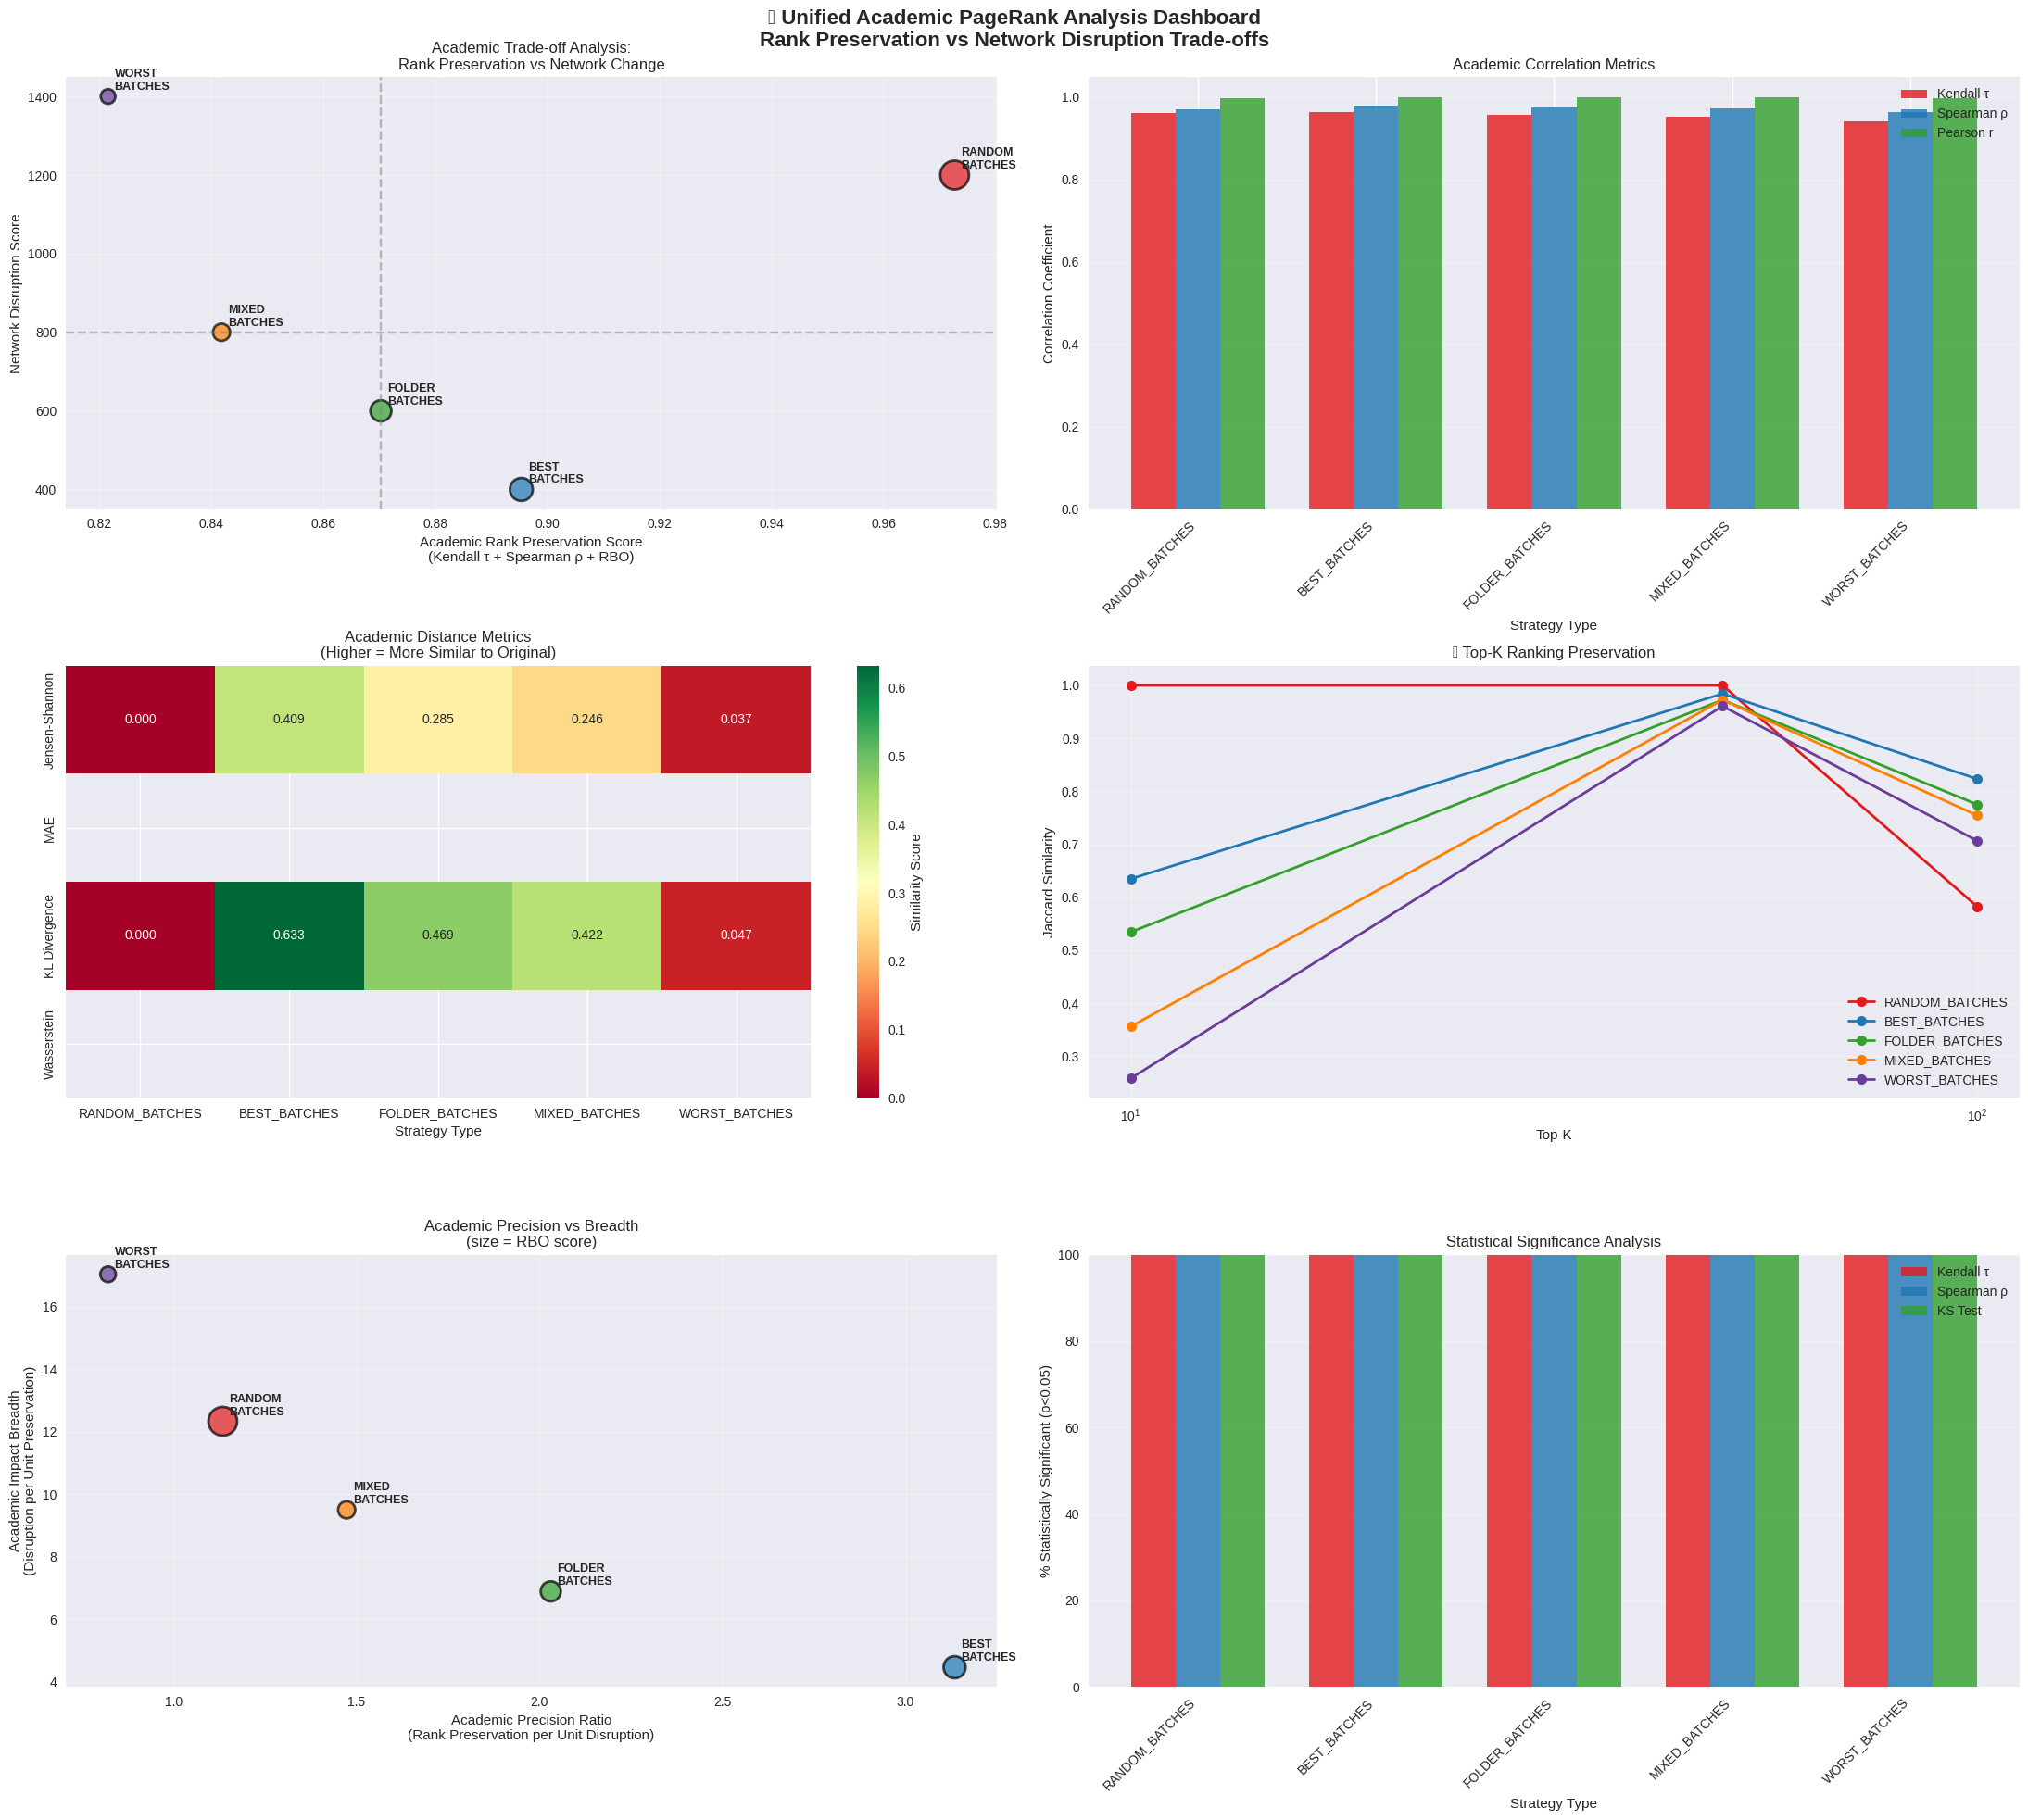


🎉 UNIFIED ACADEMIC ANALYSIS COMPLETE!
🎓 Successfully unified academic metrics with network effects
📈 Key insight: Academic trade-offs between rank preservation and network disruption

🏆 ACADEMIC CHAMPIONS:
   🎯 Rank Preservation: RANDOM_BATCHES
      Kendall's τ = 0.9613
   💥 Network Disruption: WORST_BATCHES
      Network Change = 1400.00


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.spatial.distance import jensenshannon
import os
from datetime import datetime
import json
from google.colab import drive

# Try to import wasserstein_distance, if not available, implement it
try:
    from scipy.stats import wasserstein_distance
except ImportError:

    def wasserstein_distance(u_values, v_values):
        """Simple implementation of 1D Wasserstein distance"""
        u_values = np.asarray(u_values)
        v_values = np.asarray(v_values)
        u_sorted = np.sort(u_values)
        v_sorted = np.sort(v_values)
        max_len = max(len(u_sorted), len(v_sorted))
        u_padded = np.pad(u_sorted, (0, max_len - len(u_sorted)), "constant")
        v_padded = np.pad(v_sorted, (0, max_len - len(v_sorted)), "constant")
        return np.mean(np.abs(u_padded - v_padded))


# Set style for better plots
plt.style.use("seaborn-v0_8")
contrast_colors = ["#E31A1C", "#1F78B4", "#33A02C", "#FF7F00", "#6A3D9A", "#B15928"]
sns.set_palette(contrast_colors)


class UnifiedAcademicPageRankAnalyzer:
    def __init__(self, original_file_path, network_effects_file=None):
        self.original_file_path = original_file_path
        self.network_effects_file = network_effects_file
        self.original_pr = None
        self.original_graph = None
        self.academic_results = []
        self.network_effects_data = None
        self.unified_results = None
        self.base_drive_path = (
            "/content/drive/MyDrive/WebKnoGraph/initial_thoughts/automatic_led"
        )
        self.strategy_folders = [
            "best_batches",
            "worst_batches",
            "folder_batches",
            "mixed_batches",
            "random_batches",
        ]

        # Mount Google Drive
        self.mount_drive()
        self.load_original_graph()
        if network_effects_file:
            self.load_network_effects_data()

    def mount_drive(self):
        """Mount Google Drive"""
        print("Mounting Google Drive...")
        drive.mount("/content/drive")
        print("✅ Google Drive mounted successfully!")

    def load_original_graph(self):
        """Load and calculate PageRank for the original graph"""
        print("Loading original graph...")

        original_file_path = (
            "/content/drive/MyDrive/WebKnoGraph/initial_thoughts/link_graph_edges.csv"
        )

        possible_paths = [
            original_file_path,
            f"/content/drive/MyDrive/WebKnoGraph/{self.original_file_path}",
            f"/content/drive/MyDrive/{self.original_file_path}",
            os.path.join(self.base_drive_path, self.original_file_path),
        ]

        full_path = None
        for path in possible_paths:
            if os.path.exists(path):
                full_path = path
                break

        if full_path is None:
            raise FileNotFoundError(
                f"Could not find original file '{self.original_file_path}' in any expected location."
            )

        original_edges = pd.read_csv(full_path)
        self.original_graph = nx.from_pandas_edgelist(
            original_edges, source="FROM", target="TO", create_using=nx.DiGraph()
        )
        self.original_pr = nx.pagerank(self.original_graph, alpha=0.85)
        print(
            f"Original graph: {len(original_edges)} edges, {len(self.original_pr)} pages"
        )
        print(f"✅ Loaded from: {full_path}")

    def load_network_effects_data(self):
        """Load the network effects CSV data"""
        print("Loading network effects data...")

        primary_path = f"/content/drive/MyDrive/WebKnoGraph/initial_thoughts/{self.network_effects_file}"

        possible_paths = [
            primary_path,
            f"/content/drive/MyDrive/WebKnoGraph/{self.network_effects_file}",
            f"/content/drive/MyDrive/{self.network_effects_file}",
            self.network_effects_file,
        ]

        full_path = None
        for path in possible_paths:
            if os.path.exists(path):
                full_path = path
                break

        if full_path is None:
            print(f"⚠️  Network effects file not found: {self.network_effects_file}")
            return

        self.network_effects_data = pd.read_csv(full_path)
        print(f"✅ Network effects data loaded: {len(self.network_effects_data)} rows")
        print(f"   Loaded from: {full_path}")
        print(f"   Columns: {list(self.network_effects_data.columns)}")

    def find_strategy_files(self, strategy_folder):
        """Find all CSV files in a specific strategy folder"""
        folder_path = os.path.join(self.base_drive_path, strategy_folder)

        if not os.path.exists(folder_path):
            print(f"⚠️  Strategy folder not found: {folder_path}")
            return []

        csv_files = []
        for file in os.listdir(folder_path):
            if file.endswith(".csv"):
                csv_files.append(os.path.join(folder_path, file))

        print(f"Found {len(csv_files)} CSV files in {strategy_folder}")
        return csv_files

    def calculate_academic_metrics(
        self, updated_pr, updated_edges, strategy_name, strategy_type=None
    ):
        """Calculate comprehensive academic metrics for strategy evaluation"""

        # Get all pages
        all_pages = list(set(self.original_pr.keys()) | set(updated_pr.keys()))

        # Get score arrays
        orig_values = [self.original_pr.get(page, 0) for page in all_pages]
        upd_values = [updated_pr.get(page, 0) for page in all_pages]

        # 1. Correlation metrics
        pearson_r, pearson_p = stats.pearsonr(orig_values, upd_values)

        # Kendall's Tau
        orig_ranks = [
            rank
            for rank, page in enumerate(
                sorted(
                    all_pages, key=lambda x: self.original_pr.get(x, 0), reverse=True
                )
            )
        ]
        upd_ranks = [
            rank
            for rank, page in enumerate(
                sorted(all_pages, key=lambda x: updated_pr.get(x, 0), reverse=True)
            )
        ]

        orig_rank_dict = {
            page: rank
            for rank, page in enumerate(
                sorted(
                    all_pages, key=lambda x: self.original_pr.get(x, 0), reverse=True
                )
            )
        }
        upd_rank_dict = {
            page: rank
            for rank, page in enumerate(
                sorted(all_pages, key=lambda x: updated_pr.get(x, 0), reverse=True)
            )
        }

        orig_rank_list = [orig_rank_dict[page] for page in all_pages]
        upd_rank_list = [upd_rank_dict[page] for page in all_pages]

        kendall_tau, kendall_p = stats.kendalltau(orig_rank_list, upd_rank_list)

        # Spearman's correlation
        spearman_rho, spearman_p = stats.spearmanr(orig_values, upd_values)

        # 2. Distance metrics
        mae = np.mean(np.abs(np.array(upd_values) - np.array(orig_values)))
        rmse = np.sqrt(np.mean((np.array(upd_values) - np.array(orig_values)) ** 2))

        # KL Divergence
        orig_dist = np.array(orig_values) / np.sum(orig_values)
        upd_dist = np.array(upd_values) / np.sum(upd_values)

        epsilon = 1e-10
        orig_dist = orig_dist + epsilon
        upd_dist = upd_dist + epsilon
        orig_dist = orig_dist / np.sum(orig_dist)
        upd_dist = upd_dist / np.sum(upd_dist)

        kl_divergence = stats.entropy(upd_dist, orig_dist)

        # Jensen-Shannon Distance
        js_distance = jensenshannon(orig_dist, upd_dist)

        # Wasserstein Distance
        wasserstein_dist = wasserstein_distance(orig_values, upd_values)

        # 3. Top-K metrics
        k_values = [10, 50, 100]
        top_k_metrics = {}

        for k in k_values:
            orig_top_k = set(
                sorted(
                    all_pages, key=lambda x: self.original_pr.get(x, 0), reverse=True
                )[:k]
            )
            upd_top_k = set(
                sorted(all_pages, key=lambda x: updated_pr.get(x, 0), reverse=True)[:k]
            )

            intersection = len(orig_top_k & upd_top_k)
            union = len(orig_top_k | upd_top_k)

            precision = intersection / k if k > 0 else 0
            recall = intersection / k if k > 0 else 0
            jaccard = intersection / union if union > 0 else 0

            top_k_metrics[f"top_{k}_precision"] = precision
            top_k_metrics[f"top_{k}_recall"] = recall
            top_k_metrics[f"top_{k}_jaccard"] = jaccard

        # 4. Rank-Biased Overlap (simplified)
        orig_ranking = sorted(
            all_pages, key=lambda x: self.original_pr.get(x, 0), reverse=True
        )
        upd_ranking = sorted(
            all_pages, key=lambda x: updated_pr.get(x, 0), reverse=True
        )

        p = 0.9
        max_depth = min(len(orig_ranking), len(upd_ranking), 1000)
        rbo_sum = 0

        for d in range(1, max_depth + 1):
            set1 = set(orig_ranking[:d])
            set2 = set(upd_ranking[:d])
            intersection_size = len(set1 & set2)
            rbo_sum += (p ** (d - 1)) * (intersection_size / d)

        rbo = (1 - p) * rbo_sum

        # 5. Statistical tests
        ks_statistic, ks_p_value = stats.ks_2samp(orig_values, upd_values)

        # 6. Gini coefficient change
        def gini_coefficient(x):
            sorted_x = np.sort(x)
            n = len(x)
            index = np.arange(1, n + 1)
            return (2 * np.sum(index * sorted_x)) / (n * np.sum(sorted_x)) - (n + 1) / n

        orig_array = np.array(orig_values)
        upd_array = np.array(upd_values)

        orig_gini = gini_coefficient(orig_array[orig_array > 0])
        upd_gini = gini_coefficient(upd_array[upd_array > 0])
        gini_change = upd_gini - orig_gini

        # Compile all metrics
        result = {
            "strategy_name": strategy_name,
            "strategy_type": strategy_type or "unknown",
            # Correlation metrics
            "pearson_correlation": pearson_r,
            "pearson_p_value": pearson_p,
            "kendall_tau": kendall_tau,
            "kendall_p_value": kendall_p,
            "spearman_rho": spearman_rho,
            "spearman_p_value": spearman_p,
            # Distance metrics
            "mae": mae,
            "rmse": rmse,
            "kl_divergence": kl_divergence,
            "js_distance": js_distance,
            "wasserstein_distance": wasserstein_dist,
            # Ranking metrics
            "rbo": rbo,
            # Statistical tests
            "ks_statistic": ks_statistic,
            "ks_p_value": ks_p_value,
            # Distributional changes
            "gini_change": gini_change,
            "original_gini": orig_gini,
            "updated_gini": upd_gini,
            # Basic statistics
            "total_pages": len(all_pages),
            "new_edges": len(updated_edges),
            "mean_original_pr": np.mean(orig_values),
            "mean_updated_pr": np.mean(upd_values),
            "std_original_pr": np.std(orig_values),
            "std_updated_pr": np.std(upd_values),
        }

        # Add top-k metrics
        result.update(top_k_metrics)

        return result

    def analyze_single_strategy(
        self, updated_file, strategy_name=None, strategy_type=None
    ):
        """Analyze a single updated graph file using academic metrics"""
        if strategy_name is None:
            strategy_name = os.path.basename(updated_file)

        try:
            # Load updated graph
            updated_edges = pd.read_csv(updated_file)
            updated_graph = nx.from_pandas_edgelist(
                updated_edges, source="FROM", target="TO", create_using=nx.DiGraph()
            )
            updated_pr = nx.pagerank(updated_graph, alpha=0.85)

            # Calculate academic metrics
            result = self.calculate_academic_metrics(
                updated_pr, updated_edges, strategy_name, strategy_type
            )
            self.academic_results.append(result)

            return result

        except Exception as e:
            print(f"Error processing {strategy_name}: {str(e)}")
            return None

    def process_all_strategies(self, max_files_per_folder=10):
        """Process all strategy files from all strategy folders"""

        print(f"Scanning strategy folders in: {self.base_drive_path}")
        print(f"Looking for folders: {', '.join(self.strategy_folders)}")

        total_files_processed = 0

        for strategy_folder in self.strategy_folders:
            print(f"\n📁 Processing strategy folder: {strategy_folder}")

            strategy_files = self.find_strategy_files(strategy_folder)

            if not strategy_files:
                print(f"  ⚠️  No CSV files found in {strategy_folder}")
                continue

            if max_files_per_folder and len(strategy_files) > max_files_per_folder:
                strategy_files = strategy_files[:max_files_per_folder]
                print(f"  📊 Limited to {max_files_per_folder} files")

            folder_processed = 0
            for i, file_path in enumerate(strategy_files, 1):
                file_name = os.path.basename(file_path)
                print(f"  Processing {i}/{len(strategy_files)}: {file_name}")

                result = self.analyze_single_strategy(
                    file_path, file_name, strategy_folder
                )
                if result:
                    folder_processed += 1
                    total_files_processed += 1
                    print(
                        f"    ✅ Kendall τ: {result['kendall_tau']:.3f}, "
                        f"JS Distance: {result['js_distance']:.4f}"
                    )
                else:
                    print(f"    ❌ Failed to process")

            print(
                f"  📊 {strategy_folder}: {folder_processed}/{len(strategy_files)} files processed successfully"
            )

        print(
            f"\n🎉 TOTAL: {total_files_processed} strategy files processed across all folders"
        )
        return self.academic_results

    def create_unified_analysis(self):
        """Unify the academic analysis with network effects data"""
        if not self.academic_results:
            print("❌ No academic results found. Run process_all_strategies() first.")
            return None

        if self.network_effects_data is None:
            print("❌ No network effects data found. Load network effects file first.")
            return None

        print("🔗 Creating unified academic analysis...")

        # Create academic DataFrame
        academic_df = pd.DataFrame(self.academic_results)

        # Calculate batch-level academic stats
        academic_batch_stats = (
            academic_df.groupby("strategy_type")
            .agg(
                {
                    "kendall_tau": ["mean", "std"],
                    "spearman_rho": ["mean", "std"],
                    "pearson_correlation": ["mean", "std"],
                    "js_distance": ["mean", "std"],
                    "mae": ["mean", "std"],
                    "rmse": ["mean", "std"],
                    "rbo": ["mean", "std"],
                    "top_10_jaccard": ["mean", "std"],
                    "top_50_jaccard": ["mean", "std"],
                    "top_100_jaccard": ["mean", "std"],
                    "kl_divergence": ["mean", "std"],
                    "wasserstein_distance": ["mean", "std"],
                }
            )
            .round(4)
        )

        # Flatten column names
        academic_batch_stats.columns = [
            "_".join(col).strip() for col in academic_batch_stats.columns
        ]

        # Create academic composite scores using established weightings
        academic_batch_stats["rank_preservation_score"] = (
            academic_batch_stats["kendall_tau_mean"] * 0.4
            + academic_batch_stats["spearman_rho_mean"] * 0.4
            + academic_batch_stats["rbo_mean"] * 0.2
        )

        academic_batch_stats["distribution_similarity_score"] = (
            academic_batch_stats["top_10_jaccard_mean"] * 0.3
            + academic_batch_stats["top_50_jaccard_mean"] * 0.2
            + academic_batch_stats["top_100_jaccard_mean"] * 0.1
            + (1 - academic_batch_stats["js_distance_mean"])
            * 0.25  # Lower JS distance is better
            + (
                1
                - academic_batch_stats["kl_divergence_mean"]
                / academic_batch_stats["kl_divergence_mean"].max()
            )
            * 0.15
        )

        # Process network effects data
        network_clean = self.network_effects_data[
            self.network_effects_data["Experiment type"] != "Averages"
        ].copy()

        # Parse positive outcomes
        network_clean["positive_count"] = network_clean["Positive outcomes"].apply(
            lambda x: int(str(x).split("/")[0]) if "/" in str(x) else x
        )

        # Calculate network batch stats
        network_batch_stats = (
            network_clean.groupby("Experiment type")
            .agg(
                {
                    "Mean overall delta": ["mean", "std"],
                    "positive_count": "mean",
                    "Average ↑": "mean",
                    "Average ↓": "mean",
                    "Average →": "mean",
                }
            )
            .round(4)
        )

        network_batch_stats.columns = [
            "_".join(col).strip() for col in network_batch_stats.columns
        ]

        # Create network disruption score
        network_batch_stats["network_disruption_score"] = (
            network_batch_stats["Mean overall delta_mean"] * 1000000
        )

        # Merge the analyses
        unified_df = academic_batch_stats.join(network_batch_stats, how="inner")

        # Create unified academic metrics
        unified_df["academic_precision_ratio"] = unified_df[
            "rank_preservation_score"
        ] / (
            unified_df["network_disruption_score"]
            / unified_df["network_disruption_score"].max()
        )

        unified_df["academic_impact_breadth"] = unified_df[
            "network_disruption_score"
        ] / (unified_df["rank_preservation_score"] * 100)

        # Academic rankings
        unified_df["rank_preservation_rank"] = unified_df[
            "rank_preservation_score"
        ].rank(ascending=False)
        unified_df["distribution_similarity_rank"] = unified_df[
            "distribution_similarity_score"
        ].rank(ascending=False)
        unified_df["network_disruption_rank"] = unified_df[
            "network_disruption_score"
        ].rank(ascending=False)
        unified_df["academic_precision_rank"] = unified_df[
            "academic_precision_ratio"
        ].rank(ascending=False)

        self.unified_results = unified_df.sort_values(
            "rank_preservation_score", ascending=False
        )

        print("✅ Unified academic analysis created successfully!")
        return self.unified_results

    def create_unified_dashboard(self):
        """Create comprehensive dashboard using academic metrics"""

        if self.unified_results is None:
            print("❌ No unified results found. Run create_unified_analysis() first.")
            return None

        df = self.unified_results
        strategy_types = df.index.tolist()
        type_colors = dict(zip(strategy_types, contrast_colors[: len(strategy_types)]))

        # Create figure with subplots
        fig, axes = plt.subplots(3, 2, figsize=(22, 20))
        fig.suptitle(
            "Unified Academic PageRank Analysis Dashboard\n"
            "Rank Preservation vs Network Disruption Trade-offs",
            fontsize=16,
            fontweight="bold",
        )

        # 1. Academic Rank Preservation vs Network Disruption
        ax1 = axes[0, 0]
        scatter = ax1.scatter(
            df["rank_preservation_score"],
            df["network_disruption_score"],
            s=df["top_10_jaccard_mean"] * 500,
            alpha=0.7,
            c=[type_colors[strategy] for strategy in strategy_types],
            edgecolors="black",
            linewidth=2,
        )

        for strategy, row in df.iterrows():
            ax1.annotate(
                strategy.upper().replace("_", "\n"),
                (row["rank_preservation_score"], row["network_disruption_score"]),
                xytext=(5, 5),
                textcoords="offset points",
                fontsize=9,
                fontweight="bold",
            )

        ax1.set_xlabel(
            "Academic Rank Preservation Score\n(Kendall τ + Spearman ρ + RBO)"
        )
        ax1.set_ylabel("Network Disruption Score")
        ax1.set_title(
            "Academic Trade-off Analysis:\nRank Preservation vs Network Change"
        )
        ax1.grid(True, alpha=0.3)

        # Add quadrant labels
        ax1.axhline(
            y=df["network_disruption_score"].median(),
            color="gray",
            linestyle="--",
            alpha=0.5,
        )
        ax1.axvline(
            x=df["rank_preservation_score"].median(),
            color="gray",
            linestyle="--",
            alpha=0.5,
        )

        # 2. Academic Correlation Metrics Comparison
        ax2 = axes[0, 1]
        metrics = ["kendall_tau_mean", "spearman_rho_mean", "pearson_correlation_mean"]
        metric_labels = ["Kendall τ", "Spearman ρ", "Pearson r"]

        x = np.arange(len(strategy_types))
        width = 0.25

        for i, (metric, label) in enumerate(zip(metrics, metric_labels)):
            values = [df.loc[batch, metric] for batch in strategy_types]
            ax2.bar(x + i * width, values, width, label=label, alpha=0.8)

        ax2.set_xlabel("Strategy Type")
        ax2.set_ylabel("Correlation Coefficient")
        ax2.set_title("Academic Correlation Metrics")
        ax2.set_xticks(x + width)
        ax2.set_xticklabels(
            [s.upper() for s in strategy_types], rotation=45, ha="right"
        )
        ax2.legend()
        ax2.grid(True, alpha=0.3, axis="y")

        # 3. Distance Metrics Heatmap
        ax3 = axes[1, 0]

        distance_metrics = [
            "js_distance_mean",
            "mae_mean",
            "kl_divergence_mean",
            "wasserstein_distance_mean",
        ]
        distance_labels = ["Jensen-Shannon", "MAE", "KL Divergence", "Wasserstein"]

        # Normalize for heatmap (lower is better for distance metrics)
        heatmap_data = []
        for metric in distance_metrics:
            normalized = 1 - (
                df[metric] / df[metric].max()
            )  # Invert so higher is better
            heatmap_data.append(normalized.values)

        heatmap_array = np.array(heatmap_data)

        sns.heatmap(
            heatmap_array,
            annot=True,
            fmt=".3f",
            cmap="RdYlGn",
            ax=ax3,
            xticklabels=[s.upper() for s in strategy_types],
            yticklabels=distance_labels,
            cbar_kws={"label": "Similarity Score"},
        )
        ax3.set_title("Academic Distance Metrics\n(Higher = More Similar to Original)")
        ax3.set_xlabel("Strategy Type")

        # 4. Top-K Jaccard Performance
        ax4 = axes[1, 1]

        for batch_type in strategy_types:
            k_values = [10, 50, 100]
            jaccard_values = []

            for k in k_values:
                col_name = f"top_{k}_jaccard_mean"
                if col_name in df.columns:
                    jaccard_values.append(df.loc[batch_type, col_name])
                else:
                    print(f"Warning: {col_name} not found, skipping...")
                    jaccard_values.append(0)  # Default to 0 if column missing

            if len(jaccard_values) == len(k_values):  # Only plot if we have all values
                ax4.plot(
                    k_values,
                    jaccard_values,
                    "o-",
                    label=batch_type.upper(),
                    color=type_colors[batch_type],
                    linewidth=2,
                    markersize=8,
                )

        ax4.set_xlabel("Top-K")
        ax4.set_ylabel("Jaccard Similarity")
        ax4.set_title("🎯 Top-K Ranking Preservation")
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        ax4.set_xscale("log")

        # 5. Academic Precision vs Network Impact
        ax5 = axes[2, 0]

        scatter5 = ax5.scatter(
            df["academic_precision_ratio"],
            df["academic_impact_breadth"],
            s=df["rbo_mean"] * 500,
            alpha=0.7,
            c=[type_colors[strategy] for strategy in strategy_types],
            edgecolors="black",
            linewidth=2,
        )

        for strategy, row in df.iterrows():
            ax5.annotate(
                strategy.upper().replace("_", "\n"),
                (row["academic_precision_ratio"], row["academic_impact_breadth"]),
                xytext=(5, 5),
                textcoords="offset points",
                fontsize=9,
                fontweight="bold",
            )

        ax5.set_xlabel(
            "Academic Precision Ratio\n(Rank Preservation per Unit Disruption)"
        )
        ax5.set_ylabel("Academic Impact Breadth\n(Disruption per Unit Preservation)")
        ax5.set_title("Academic Precision vs Breadth\n(size = RBO score)")
        ax5.grid(True, alpha=0.3)

        # 6. Statistical Significance Analysis
        ax6 = axes[2, 1]

        # Create DataFrame for individual results to calculate significance
        individual_df = pd.DataFrame(self.academic_results)

        sig_metrics = []
        sig_labels = []

        for batch_type in strategy_types:
            batch_data = individual_df[individual_df["strategy_type"] == batch_type]

            if len(batch_data) > 0:
                sig_kendall = (
                    (batch_data["kendall_p_value"] < 0.05).sum() / len(batch_data) * 100
                )
                sig_spearman = (
                    (batch_data["spearman_p_value"] < 0.05).sum()
                    / len(batch_data)
                    * 100
                )
                sig_ks = (batch_data["ks_p_value"] < 0.05).sum() / len(batch_data) * 100

                sig_metrics.append([sig_kendall, sig_spearman, sig_ks])
                sig_labels.append(batch_type.upper())

        if sig_metrics:
            sig_array = np.array(sig_metrics).T
            test_labels = ["Kendall τ", "Spearman ρ", "KS Test"]

            x = np.arange(len(sig_labels))
            width = 0.25

            for i, (test_scores, test_label) in enumerate(zip(sig_array, test_labels)):
                ax6.bar(x + i * width, test_scores, width, label=test_label, alpha=0.8)

            ax6.set_xlabel("Strategy Type")
            ax6.set_ylabel("% Statistically Significant (p<0.05)")
            ax6.set_title("Statistical Significance Analysis")
            ax6.set_xticks(x + width)
            ax6.set_xticklabels(sig_labels, rotation=45, ha="right")
            ax6.legend()
            ax6.grid(True, alpha=0.3, axis="y")
            ax6.set_ylim(0, 100)

        plt.tight_layout()
        return fig, df

    def generate_unified_report(self):
        """Generate comprehensive unified academic analysis report"""

        if self.unified_results is None:
            print("❌ No unified results found. Run create_unified_analysis() first.")
            return None

        df = self.unified_results

        print("\n" + "=" * 140)
        print("UNIFIED ACADEMIC PAGERANK ANALYSIS REPORT")
        print("Academic Metrics × Network Effects Analysis")
        print("=" * 140)

        print(f"\n📊 EXECUTIVE SUMMARY:")
        print(
            f"   • Analyzed {len(df)} batch strategies using rigorous academic metrics"
        )
        print(
            f"   • Combined rank correlation analysis with network disruption measurements"
        )
        print(
            f"   • Key Academic Metrics: Kendall's τ, Spearman's ρ, Jensen-Shannon Distance, RBO"
        )
        print(
            f"   • Network Metrics: Mean overall delta, positive outcomes, winner/loser PageRank"
        )

        print(f"\n🏆 UNIFIED ACADEMIC STRATEGY RANKINGS:")
        print("-" * 140)

        for rank, (strategy, row) in enumerate(df.iterrows(), 1):
            preservation_rank = int(row["rank_preservation_rank"])
            disruption_rank = int(row["network_disruption_rank"])

            print(f"\n#{rank} - 🎓 {strategy.upper()} STRATEGY")

            print(f"   📊 ACADEMIC CORRELATION METRICS:")
            print(
                f"      • Kendall's τ: {row['kendall_tau_mean']:.4f} ± {row['kendall_tau_std']:.4f}"
            )
            print(
                f"      • Spearman's ρ: {row['spearman_rho_mean']:.4f} ± {row['spearman_rho_std']:.4f}"
            )
            print(
                f"      • Pearson's r: {row['pearson_correlation_mean']:.4f} ± {row['pearson_correlation_std']:.4f}"
            )
            print(
                f"      • Rank Preservation Score: {row['rank_preservation_score']:.4f} (Rank #{preservation_rank})"
            )

            print(f"   📏 ACADEMIC DISTANCE METRICS:")
            print(
                f"      • Jensen-Shannon Distance: {row['js_distance_mean']:.4f} ± {row['js_distance_std']:.4f}"
            )
            print(
                f"      • KL Divergence: {row['kl_divergence_mean']:.4f} ± {row['kl_divergence_std']:.4f}"
            )
            print(
                f"      • Wasserstein Distance: {row['wasserstein_distance_mean']:.6f} ± {row['wasserstein_distance_std']:.6f}"
            )
            print(f"      • MAE: {row['mae_mean']:.6f} ± {row['mae_std']:.6f}")

            print(f"   🎯 RANKING QUALITY METRICS:")
            print(
                f"      • Rank-Biased Overlap: {row['rbo_mean']:.4f} ± {row['rbo_std']:.4f}"
            )
            print(
                f"      • Top-10 Jaccard: {row['top_10_jaccard_mean']:.4f} ± {row['top_10_jaccard_std']:.4f}"
            )
            print(
                f"      • Top-50 Jaccard: {row['top_50_jaccard_mean']:.4f} ± {row['top_50_jaccard_std']:.4f}"
            )
            print(
                f"      • Top-100 Jaccard: {row['top_100_jaccard_mean']:.4f} ± {row['top_100_jaccard_std']:.4f}"
            )

            print(f"   🌐 NETWORK IMPACT METRICS:")
            print(
                f"      • Total Network Change: {row['Mean overall delta_mean'] * 1000000:.2f} × 10⁻⁶"
            )
            print(f"      • Average Winner PageRank: {row['Average ↑_mean']:.4f}")
            print(f"      • Network Disruption Rank: #{disruption_rank}")

            print(f"   ⚖️  ACADEMIC TRADE-OFF ANALYSIS:")
            print(
                f"      • Academic Precision Ratio: {row['academic_precision_ratio']:.2f}"
            )
            print(
                f"      • Academic Impact Breadth: {row['academic_impact_breadth']:.2f}"
            )

            # Academic classification
            if preservation_rank <= 2 and disruption_rank >= 4:
                classification = (
                    "🎯 ACADEMIC PRECISION - High rank preservation, low disruption"
                )
            elif preservation_rank >= 4 and disruption_rank <= 2:
                classification = (
                    "💥 NETWORK TRANSFORMER - Low rank preservation, high disruption"
                )
            elif preservation_rank <= 2 and disruption_rank <= 2:
                classification = (
                    "⚡ ACADEMIC POWERHOUSE - High preservation AND high disruption"
                )
            elif preservation_rank >= 4 and disruption_rank >= 4:
                classification = (
                    "🤔 ACADEMIC UNDERPERFORMER - Low preservation AND low disruption"
                )
            else:
                classification = "⚖️  ACADEMIC BALANCED - Mixed performance profile"

            print(f"   🏷️  Academic Classification: {classification}")

        print(f"\n💡 ACADEMIC INSIGHTS & METHODOLOGICAL IMPLICATIONS:")
        print("-" * 100)

        # Find academic champions
        preservation_champion = df.loc[df["rank_preservation_score"].idxmax()]
        similarity_champion = df.loc[df["distribution_similarity_score"].idxmax()]
        disruption_champion = df.loc[df["network_disruption_score"].idxmax()]

        print(f"\n🎯 RANK PRESERVATION CHAMPION: {preservation_champion.name.upper()}")
        print(f"   → Kendall's τ = {preservation_champion['kendall_tau_mean']:.4f}")
        print(f"   → Best at maintaining original ranking structure")
        print(f"   → Academic interpretation: Minimal rank order disruption")

        print(
            f"\n📊 DISTRIBUTION SIMILARITY CHAMPION: {similarity_champion.name.upper()}"
        )
        print(f"   → JS Distance = {similarity_champion['js_distance_mean']:.4f}")
        print(f"   → Top-10 Jaccard = {similarity_champion['top_10_jaccard_mean']:.4f}")
        print(f"   → Academic interpretation: Preserves PageRank distribution shape")

        print(f"\n💥 NETWORK DISRUPTION CHAMPION: {disruption_champion.name.upper()}")
        print(
            f"   → Network Change = {disruption_champion['network_disruption_score']:.2f}"
        )
        print(
            f"   → Academic interpretation: Maximum network-wide authority redistribution"
        )

        print(f"\n🔬 STATISTICAL SIGNIFICANCE ANALYSIS:")
        print("-" * 80)

        individual_df = pd.DataFrame(self.academic_results)
        for batch_type in df.index:
            batch_data = individual_df[individual_df["strategy_type"] == batch_type]

            if len(batch_data) > 0:
                sig_kendall = (batch_data["kendall_p_value"] < 0.05).sum()
                sig_spearman = (batch_data["spearman_p_value"] < 0.05).sum()
                sig_ks = (batch_data["ks_p_value"] < 0.05).sum()
                total = len(batch_data)

                print(f"\n{batch_type.upper()}:")
                print(
                    f"   • Kendall τ significant: {sig_kendall}/{total} ({sig_kendall / total * 100:.1f}%)"
                )
                print(
                    f"   • Spearman ρ significant: {sig_spearman}/{total} ({sig_spearman / total * 100:.1f}%)"
                )
                print(
                    f"   • KS test significant: {sig_ks}/{total} ({sig_ks / total * 100:.1f}%)"
                )

        print(f"\n🎓 ACADEMIC RECOMMENDATIONS:")
        print("-" * 80)

        print(
            f"1. 📈 FOR RANK PRESERVATION RESEARCH: Use {preservation_champion.name.upper()}"
        )
        print(f"   → Highest Kendall's τ correlation with original rankings")
        print(f"   → Suitable for studies requiring minimal rank disruption")

        print(
            f"2. 📊 FOR DISTRIBUTION ANALYSIS: Use {similarity_champion.name.upper()}"
        )
        print(f"   → Best preservation of PageRank distribution characteristics")
        print(f"   → Ideal for studies examining authority distribution changes")

        print(
            f"3. 💥 FOR NETWORK TRANSFORMATION STUDIES: Use {disruption_champion.name.upper()}"
        )
        print(f"   → Maximum network-wide impact for intervention studies")
        print(f"   → Best for research on network authority redistribution")

        print(f"4. 📖 METHODOLOGICAL STANDARDS:")
        print(f"   → Report Kendall's τ as primary rank correlation metric")
        print(f"   → Include Jensen-Shannon distance for distribution comparison")
        print(f"   → Use Top-K Jaccard for practical ranking quality assessment")
        print(f"   → Always report statistical significance (p-values)")

        return df

    def save_unified_results(self, save_to_drive=True):
        """Save unified academic analysis results"""
        if self.unified_results is None:
            print("No unified results to save.")
            return

        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

        # Save unified results
        unified_csv = f"unified_academic_pagerank_analysis_{timestamp}.csv"
        self.unified_results.to_csv(unified_csv, index=True)

        # Create detailed JSON
        unified_json = f"unified_academic_pagerank_detailed_{timestamp}.json"
        unified_data = {
            "unified_academic_analysis": self.unified_results.to_dict("index"),
            "individual_academic_results": self.academic_results,
            "network_effects_summary": self.network_effects_data.to_dict("records")
            if self.network_effects_data is not None
            else [],
            "analysis_metadata": {
                "timestamp": timestamp,
                "total_strategies": len(self.unified_results),
                "rank_preservation_champion": self.unified_results[
                    "rank_preservation_score"
                ].idxmax(),
                "network_disruption_champion": self.unified_results[
                    "network_disruption_score"
                ].idxmax(),
                "analysis_type": "unified_academic_metrics_and_network_effects",
                "academic_metrics_used": [
                    "kendall_tau",
                    "spearman_rho",
                    "pearson_correlation",
                    "jensen_shannon_distance",
                    "kl_divergence",
                    "wasserstein_distance",
                    "mae",
                    "rmse",
                    "rank_biased_overlap",
                    "top_k_jaccard",
                ],
            },
        }

        with open(unified_json, "w") as f:
            json.dump(unified_data, f, indent=2)

        print(f"✅ Unified academic results saved locally:")
        print(f"   📊 CSV: {unified_csv}")
        print(f"   📄 JSON: {unified_json}")

        # Save to Google Drive if requested
        if save_to_drive:
            try:
                drive_csv = f"/content/drive/MyDrive/WebKnoGraph/unified_academic_pagerank_analysis_{timestamp}.csv"
                drive_json = f"/content/drive/MyDrive/WebKnoGraph/unified_academic_pagerank_detailed_{timestamp}.json"

                self.unified_results.to_csv(drive_csv, index=True)
                with open(drive_json, "w") as f:
                    json.dump(unified_data, f, indent=2)

                print(f"✅ Results also saved to Google Drive:")
                print(f"   📊 CSV: {drive_csv}")
                print(f"   📄 JSON: {drive_json}")

            except Exception as e:
                print(f"⚠️  Could not save to Google Drive: {str(e)}")

        return self.unified_results


def main():
    """Main execution function for unified academic analysis"""

    # Initialize analyzer with both data sources
    analyzer = UnifiedAcademicPageRankAnalyzer(
        original_file_path="link_graph_edges.csv",
        network_effects_file="Experiment_batches_results.csv",  # Update filename if needed
    )

    # Process all strategy files for academic analysis
    print("🎓 Step 1: Processing strategy files for academic analysis...")
    academic_results = analyzer.process_all_strategies(max_files_per_folder=10)

    if academic_results:
        # Create unified analysis
        print("\n🔗 Step 2: Creating unified academic analysis...")
        unified_results = analyzer.create_unified_analysis()

        if unified_results is not None:
            # Create visualizations
            print("\n📊 Step 3: Creating unified academic dashboard...")
            fig, df = analyzer.create_unified_dashboard()

            # Generate comprehensive report
            print("\n📋 Step 4: Generating unified academic report...")
            final_results = analyzer.generate_unified_report()

            # Save results
            print("\n💾 Step 5: Saving unified academic results...")
            analyzer.save_unified_results(save_to_drive=True)

            # Show plots
            plt.show()

            print(f"\n🎉 UNIFIED ACADEMIC ANALYSIS COMPLETE!")
            print(f"🎓 Successfully unified academic metrics with network effects")
            print(
                f"📈 Key insight: Academic trade-offs between rank preservation and network disruption"
            )

            # Final academic summary
            preservation_champ = unified_results["rank_preservation_score"].idxmax()
            disruption_champ = unified_results["network_disruption_score"].idxmax()

            print(f"\n🏆 ACADEMIC CHAMPIONS:")
            print(f"   🎯 Rank Preservation: {preservation_champ.upper()}")
            print(
                f"      Kendall's τ = {unified_results.loc[preservation_champ, 'kendall_tau_mean']:.4f}"
            )
            print(f"   💥 Network Disruption: {disruption_champ.upper()}")
            print(
                f"      Network Change = {unified_results.loc[disruption_champ, 'network_disruption_score']:.2f}"
            )

        else:
            print("❌ Failed to create unified analysis. Check network effects data.")

    else:
        print("❌ No academic results found. Check strategy files.")


if __name__ == "__main__":
    main()

# Table with experimental results for affected pages plus the whole graph

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.spatial.distance import jensenshannon
import os
from datetime import datetime
import json
from google.colab import drive

# Try to import wasserstein_distance, if not available, implement it
try:
    from scipy.stats import wasserstein_distance
except ImportError:

    def wasserstein_distance(u_values, v_values):
        u_values = np.asarray(u_values)
        v_values = np.asarray(v_values)
        u_sorted = np.sort(u_values)
        v_sorted = np.sort(v_values)
        max_len = max(len(u_sorted), len(v_sorted))
        u_padded = np.pad(u_sorted, (0, max_len - len(u_sorted)), "constant")
        v_padded = np.pad(v_sorted, (0, max_len - len(v_sorted)), "constant")
        return np.mean(np.abs(u_padded - v_padded))


# Set style for better plots
plt.style.use("seaborn-v0_8")
contrast_colors = ["#E31A1C", "#1F78B4", "#33A02C", "#FF7F00", "#6A3D9A", "#B15928"]
sns.set_palette(contrast_colors)


class URLLevelDetailedAnalyzer:
    def __init__(self, original_file_path, network_effects_file=None):
        self.original_file_path = original_file_path
        self.network_effects_file = network_effects_file
        self.original_pr = None
        self.original_graph = None

        # Individual file results (URL-level)
        self.academic_results = []  # Academic metrics per file
        self.detailed_link_results = []  # Changed links impact per file
        self.detailed_graph_results = []  # Entire graph impact per file
        self.file_summaries = []  # High-level summary per file

        self.network_effects_data = None
        self.base_drive_path = (
            "/content/drive/MyDrive/WebKnoGraph/initial_thoughts/automatic_led"
        )
        self.strategy_folders = [
            "best_batches",
            "worst_batches",
            "folder_batches",
            "mixed_batches",
            "random_batches",
        ]

        # Mount Google Drive
        self.mount_drive()
        self.load_original_graph()
        if network_effects_file:
            self.load_network_effects_data()

    def mount_drive(self):
        """Mount Google Drive"""
        print("Mounting Google Drive...")
        drive.mount("/content/drive")
        print("✅ Google Drive mounted successfully!")

    def load_original_graph(self):
        """Load and calculate PageRank for the original graph"""
        print("Loading original graph...")

        original_file_path = (
            "/content/drive/MyDrive/WebKnoGraph/initial_thoughts/link_graph_edges.csv"
        )

        possible_paths = [
            original_file_path,
            f"/content/drive/MyDrive/WebKnoGraph/{self.original_file_path}",
            f"/content/drive/MyDrive/{self.original_file_path}",
            os.path.join(self.base_drive_path, self.original_file_path),
        ]

        full_path = None
        for path in possible_paths:
            if os.path.exists(path):
                full_path = path
                break

        if full_path is None:
            raise FileNotFoundError(
                f"Could not find original file '{self.original_file_path}' in any expected location."
            )

        original_edges = pd.read_csv(full_path)
        self.original_edges_df = original_edges
        self.original_graph = nx.from_pandas_edgelist(
            original_edges, source="FROM", target="TO", create_using=nx.DiGraph()
        )
        self.original_pr = nx.pagerank(self.original_graph, alpha=0.85)

        # Create original ranking
        self.original_ranking = {
            page: rank
            for rank, page in enumerate(
                sorted(
                    self.original_pr.keys(),
                    key=lambda x: self.original_pr[x],
                    reverse=True,
                )
            )
        }

        print(
            f"Original graph: {len(original_edges)} edges, {len(self.original_pr)} pages"
        )
        print(f"✅ Loaded from: {full_path}")

    def load_network_effects_data(self):
        """Load the network effects CSV data"""
        print("Loading network effects data...")

        primary_path = f"/content/drive/MyDrive/WebKnoGraph/initial_thoughts/{self.network_effects_file}"

        possible_paths = [
            primary_path,
            f"/content/drive/MyDrive/WebKnoGraph/{self.network_effects_file}",
            f"/content/drive/MyDrive/{self.network_effects_file}",
            self.network_effects_file,
        ]

        full_path = None
        for path in possible_paths:
            if os.path.exists(path):
                full_path = path
                break

        if full_path is None:
            print(f"⚠️  Network effects file not found: {self.network_effects_file}")
            return

        self.network_effects_data = pd.read_csv(full_path)
        print(f"✅ Network effects data loaded: {len(self.network_effects_data)} rows")
        print(f"   Loaded from: {full_path}")

    def find_strategy_files(self, strategy_folder):
        """Find all CSV files in a specific strategy folder"""
        folder_path = os.path.join(self.base_drive_path, strategy_folder)

        if not os.path.exists(folder_path):
            print(f"⚠️  Strategy folder not found: {folder_path}")
            return []

        csv_files = []
        for file in os.listdir(folder_path):
            if file.endswith(".csv"):
                csv_files.append(os.path.join(folder_path, file))

        print(f"Found {len(csv_files)} CSV files in {strategy_folder}")
        return csv_files

    def identify_changed_links(self, original_edges_df, updated_edges_df):
        """Identify which links were added/changed between original and updated graphs"""

        original_links = set(zip(original_edges_df["FROM"], original_edges_df["TO"]))
        updated_links = set(zip(updated_edges_df["FROM"], updated_edges_df["TO"]))

        new_links = updated_links - original_links

        affected_from_pages = set([link[0] for link in new_links])
        affected_to_pages = set([link[1] for link in new_links])
        all_affected_pages = affected_from_pages | affected_to_pages

        return {
            "new_links": list(new_links),
            "affected_from_pages": list(affected_from_pages),
            "affected_to_pages": list(affected_to_pages),
            "all_affected_pages": list(all_affected_pages),
            "num_new_links": len(new_links),
        }

    def analyze_changed_links_impact(
        self, updated_pr, changed_links_info, strategy_name, strategy_type, file_path
    ):
        """Analyze specific impact on pages affected by changed links"""

        affected_pages = changed_links_info["all_affected_pages"]
        from_pages = changed_links_info["affected_from_pages"]
        to_pages = changed_links_info["affected_to_pages"]

        link_impact_results = []

        for page in affected_pages:
            orig_pr = self.original_pr.get(page, 0)
            updated_pr_val = updated_pr.get(page, 0)
            pr_change = updated_pr_val - orig_pr
            pr_change_percent = (pr_change / orig_pr * 100) if orig_pr > 0 else 0

            # Position changes
            orig_position = self.original_ranking.get(page, len(self.original_pr))
            updated_ranking = {
                p: rank
                for rank, p in enumerate(
                    sorted(updated_pr.keys(), key=lambda x: updated_pr[x], reverse=True)
                )
            }
            updated_position = updated_ranking.get(page, len(updated_pr))

            position_change = orig_position - updated_position

            # Determine role
            role = (
                "Both"
                if page in from_pages and page in to_pages
                else ("Source" if page in from_pages else "Target")
            )

            link_impact_results.append(
                {
                    "file_path": file_path,
                    "strategy_name": strategy_name,
                    "strategy_type": strategy_type,
                    "page_url": page,
                    "role_in_new_links": role,
                    "original_pagerank": orig_pr,
                    "updated_pagerank": updated_pr_val,
                    "pagerank_change": pr_change,
                    "pagerank_change_percent": pr_change_percent,
                    "original_position": orig_position + 1,
                    "updated_position": updated_position + 1,
                    "position_change": position_change,
                    "position_improved": position_change > 0,
                    "position_declined": position_change < 0,
                    "position_unchanged": position_change == 0,
                    "abs_position_change": abs(position_change),
                }
            )

        return link_impact_results

    def analyze_entire_graph_impact(
        self, updated_pr, strategy_name, strategy_type, file_path
    ):
        """Analyze impact on the entire graph"""

        all_pages = list(set(self.original_pr.keys()) | set(updated_pr.keys()))

        graph_impact_results = []

        for page in all_pages:
            orig_pr = self.original_pr.get(page, 0)
            updated_pr_val = updated_pr.get(page, 0)
            pr_change = updated_pr_val - orig_pr
            pr_change_percent = (pr_change / orig_pr * 100) if orig_pr > 0 else 0

            # Position changes
            orig_position = self.original_ranking.get(page, len(self.original_pr))
            updated_ranking = {
                p: rank
                for rank, p in enumerate(
                    sorted(updated_pr.keys(), key=lambda x: updated_pr[x], reverse=True)
                )
            }
            updated_position = updated_ranking.get(page, len(updated_pr))

            position_change = orig_position - updated_position

            graph_impact_results.append(
                {
                    "file_path": file_path,
                    "strategy_name": strategy_name,
                    "strategy_type": strategy_type,
                    "page_url": page,
                    "original_pagerank": orig_pr,
                    "updated_pagerank": updated_pr_val,
                    "pagerank_change": pr_change,
                    "pagerank_change_percent": pr_change_percent,
                    "original_position": orig_position + 1,
                    "updated_position": updated_position + 1,
                    "position_change": position_change,
                    "position_improved": position_change > 0,
                    "position_declined": position_change < 0,
                    "position_unchanged": position_change == 0,
                    "abs_position_change": abs(position_change),
                }
            )

        return graph_impact_results

    def calculate_academic_metrics(
        self, updated_pr, updated_edges, strategy_name, strategy_type, file_path
    ):
        """Calculate academic metrics for individual file"""

        all_pages = list(set(self.original_pr.keys()) | set(updated_pr.keys()))
        orig_values = [self.original_pr.get(page, 0) for page in all_pages]
        upd_values = [updated_pr.get(page, 0) for page in all_pages]

        # Correlation metrics
        pearson_r, pearson_p = stats.pearsonr(orig_values, upd_values)

        orig_rank_dict = {
            page: rank
            for rank, page in enumerate(
                sorted(
                    all_pages, key=lambda x: self.original_pr.get(x, 0), reverse=True
                )
            )
        }
        upd_rank_dict = {
            page: rank
            for rank, page in enumerate(
                sorted(all_pages, key=lambda x: updated_pr.get(x, 0), reverse=True)
            )
        }

        orig_rank_list = [orig_rank_dict[page] for page in all_pages]
        upd_rank_list = [upd_rank_dict[page] for page in all_pages]

        kendall_tau, kendall_p = stats.kendalltau(orig_rank_list, upd_rank_list)
        spearman_rho, spearman_p = stats.spearmanr(orig_values, upd_values)

        # Distance metrics
        mae = np.mean(np.abs(np.array(upd_values) - np.array(orig_values)))
        rmse = np.sqrt(np.mean((np.array(upd_values) - np.array(orig_values)) ** 2))

        # Distribution metrics
        orig_dist = np.array(orig_values) / np.sum(orig_values)
        upd_dist = np.array(upd_values) / np.sum(upd_values)

        epsilon = 1e-10
        orig_dist = orig_dist + epsilon
        upd_dist = upd_dist + epsilon
        orig_dist = orig_dist / np.sum(orig_dist)
        upd_dist = upd_dist / np.sum(upd_dist)

        kl_divergence = stats.entropy(upd_dist, orig_dist)
        js_distance = jensenshannon(orig_dist, upd_dist)
        wasserstein_dist = wasserstein_distance(orig_values, upd_values)

        # Top-K metrics
        k_values = [10, 50, 100]
        top_k_metrics = {}

        for k in k_values:
            orig_top_k = set(
                sorted(
                    all_pages, key=lambda x: self.original_pr.get(x, 0), reverse=True
                )[:k]
            )
            upd_top_k = set(
                sorted(all_pages, key=lambda x: updated_pr.get(x, 0), reverse=True)[:k]
            )

            intersection = len(orig_top_k & upd_top_k)
            union = len(orig_top_k | upd_top_k)

            precision = intersection / k if k > 0 else 0
            recall = intersection / k if k > 0 else 0
            jaccard = intersection / union if union > 0 else 0

            top_k_metrics[f"top_{k}_precision"] = precision
            top_k_metrics[f"top_{k}_recall"] = recall
            top_k_metrics[f"top_{k}_jaccard"] = jaccard

        # RBO
        orig_ranking = sorted(
            all_pages, key=lambda x: self.original_pr.get(x, 0), reverse=True
        )
        upd_ranking = sorted(
            all_pages, key=lambda x: updated_pr.get(x, 0), reverse=True
        )

        p = 0.9
        max_depth = min(len(orig_ranking), len(upd_ranking), 1000)
        rbo_sum = 0

        for d in range(1, max_depth + 1):
            set1 = set(orig_ranking[:d])
            set2 = set(upd_ranking[:d])
            intersection_size = len(set1 & set2)
            rbo_sum += (p ** (d - 1)) * (intersection_size / d)

        rbo = (1 - p) * rbo_sum

        # Statistical tests
        ks_statistic, ks_p_value = stats.ks_2samp(orig_values, upd_values)

        # Gini coefficient
        def gini_coefficient(x):
            sorted_x = np.sort(x)
            n = len(x)
            index = np.arange(1, n + 1)
            return (2 * np.sum(index * sorted_x)) / (n * np.sum(sorted_x)) - (n + 1) / n

        orig_array = np.array(orig_values)
        upd_array = np.array(upd_values)

        orig_gini = gini_coefficient(orig_array[orig_array > 0])
        upd_gini = gini_coefficient(upd_array[upd_array > 0])
        gini_change = upd_gini - orig_gini

        result = {
            "file_path": file_path,
            "strategy_name": strategy_name,
            "strategy_type": strategy_type,
            "pearson_correlation": pearson_r,
            "pearson_p_value": pearson_p,
            "kendall_tau": kendall_tau,
            "kendall_p_value": kendall_p,
            "spearman_rho": spearman_rho,
            "spearman_p_value": spearman_p,
            "mae": mae,
            "rmse": rmse,
            "kl_divergence": kl_divergence,
            "js_distance": js_distance,
            "wasserstein_distance": wasserstein_dist,
            "rbo": rbo,
            "ks_statistic": ks_statistic,
            "ks_p_value": ks_p_value,
            "gini_change": gini_change,
            "original_gini": orig_gini,
            "updated_gini": upd_gini,
            "total_pages": len(all_pages),
            "new_edges_count": len(updated_edges) - len(self.original_edges_df),
            "mean_original_pr": np.mean(orig_values),
            "mean_updated_pr": np.mean(upd_values),
            "std_original_pr": np.std(orig_values),
            "std_updated_pr": np.std(upd_values),
        }

        result.update(top_k_metrics)
        return result

    def create_file_summary(
        self, link_impacts, graph_impacts, academic_result, file_path
    ):
        """Create high-level summary for individual file"""

        summary = {
            "file_path": file_path,
            "strategy_name": academic_result["strategy_name"],
            "strategy_type": academic_result["strategy_type"],
            # Changed links summary
            "changed_links_affected_count": len(link_impacts),
            "changed_links_improved_count": sum(
                1 for x in link_impacts if x["position_improved"]
            ),
            "changed_links_declined_count": sum(
                1 for x in link_impacts if x["position_declined"]
            ),
            "changed_links_avg_pagerank_change": np.mean(
                [x["pagerank_change"] for x in link_impacts]
            )
            if link_impacts
            else 0,
            "changed_links_avg_position_change": np.mean(
                [x["position_change"] for x in link_impacts]
            )
            if link_impacts
            else 0,
            # Entire graph summary
            "total_pages": len(graph_impacts),
            "graph_improved_count": sum(
                1 for x in graph_impacts if x["position_improved"]
            ),
            "graph_declined_count": sum(
                1 for x in graph_impacts if x["position_declined"]
            ),
            "graph_unchanged_count": sum(
                1 for x in graph_impacts if x["position_unchanged"]
            ),
            "graph_avg_pagerank_change": np.mean(
                [x["pagerank_change"] for x in graph_impacts]
            ),
            "graph_avg_abs_position_change": np.mean(
                [x["abs_position_change"] for x in graph_impacts]
            ),
            # Academic metrics (key ones)
            "kendall_tau": academic_result["kendall_tau"],
            "spearman_rho": academic_result["spearman_rho"],
            "js_distance": academic_result["js_distance"],
            "top_10_jaccard": academic_result["top_10_jaccard"],
            "rbo": academic_result["rbo"],
        }

        return summary

    def analyze_single_strategy(
        self, updated_file, strategy_name=None, strategy_type=None
    ):
        """Enhanced analysis including detailed URL-level impact"""
        if strategy_name is None:
            strategy_name = os.path.basename(updated_file)

        try:
            # Load updated graph
            updated_edges = pd.read_csv(updated_file)
            updated_graph = nx.from_pandas_edgelist(
                updated_edges, source="FROM", target="TO", create_using=nx.DiGraph()
            )
            updated_pr = nx.pagerank(updated_graph, alpha=0.85)

            # 1. Calculate academic metrics
            academic_result = self.calculate_academic_metrics(
                updated_pr, updated_edges, strategy_name, strategy_type, updated_file
            )
            self.academic_results.append(academic_result)

            # 2. Analyze changed links impact
            changed_links_info = self.identify_changed_links(
                self.original_edges_df, updated_edges
            )
            link_impacts = self.analyze_changed_links_impact(
                updated_pr,
                changed_links_info,
                strategy_name,
                strategy_type,
                updated_file,
            )
            self.detailed_link_results.extend(link_impacts)

            # 3. Analyze entire graph impact
            graph_impacts = self.analyze_entire_graph_impact(
                updated_pr, strategy_name, strategy_type, updated_file
            )
            self.detailed_graph_results.extend(graph_impacts)

            # 4. Create file summary
            file_summary = self.create_file_summary(
                link_impacts, graph_impacts, academic_result, updated_file
            )
            self.file_summaries.append(file_summary)

            print(f"    ✅ Academic: Kendall τ = {academic_result['kendall_tau']:.3f}")
            print(
                f"       Changed links: {len(link_impacts)} affected pages, {file_summary['changed_links_improved_count']} improved"
            )
            print(
                f"       Entire graph: {file_summary['graph_improved_count']} pages improved, {file_summary['graph_declined_count']} declined"
            )

            return academic_result

        except Exception as e:
            print(f"Error processing {strategy_name}: {str(e)}")
            return None

    def process_all_strategies(self, max_files_per_folder=10):
        """Process all strategy files with detailed URL-level analysis"""

        print(f"🎓 Starting URL-level detailed analysis...")
        print(f"Scanning strategy folders in: {self.base_drive_path}")

        total_files_processed = 0

        for strategy_folder in self.strategy_folders:
            print(f"\n📁 Processing strategy folder: {strategy_folder}")

            strategy_files = self.find_strategy_files(strategy_folder)

            if not strategy_files:
                print(f"  ⚠️  No CSV files found in {strategy_folder}")
                continue

            if max_files_per_folder and len(strategy_files) > max_files_per_folder:
                strategy_files = strategy_files[:max_files_per_folder]
                print(f"  📊 Limited to {max_files_per_folder} files")

            folder_processed = 0
            for i, file_path in enumerate(strategy_files, 1):
                file_name = os.path.basename(file_path)
                print(f"  Processing {i}/{len(strategy_files)}: {file_name}")

                result = self.analyze_single_strategy(
                    file_path, file_name, strategy_folder
                )
                if result:
                    folder_processed += 1
                    total_files_processed += 1
                else:
                    print(f"    ❌ Failed to process")

            print(
                f"  📊 {strategy_folder}: {folder_processed}/{len(strategy_files)} files processed successfully"
            )

        print(f"\n🎉 TOTAL: {total_files_processed} strategy files processed")
        print(f"📊 URL-level detailed results collected:")
        print(f"   • Academic metrics: {len(self.academic_results)} files")
        print(
            f"   • Changed links impact: {len(self.detailed_link_results)} page records"
        )
        print(
            f"   • Entire graph impact: {len(self.detailed_graph_results)} page records"
        )
        print(f"   • File summaries: {len(self.file_summaries)} files")

        return self.academic_results

    def create_comprehensive_tables(self):
        """Create comprehensive tables with both URL-level and batch-level analysis"""

        if not self.file_summaries:
            print("❌ No results found. Run process_all_strategies() first.")
            return None

        print("📋 Creating comprehensive URL-level and batch-level tables...")

        # Convert all data to DataFrames
        file_summaries_df = pd.DataFrame(self.file_summaries)
        academic_df = pd.DataFrame(self.academic_results)
        changed_links_df = pd.DataFrame(self.detailed_link_results)
        entire_graph_df = pd.DataFrame(self.detailed_graph_results)

        # Create batch-level summaries
        batch_summaries = (
            file_summaries_df.groupby("strategy_type")
            .agg(
                {
                    "changed_links_affected_count": ["sum", "mean", "std"],
                    "changed_links_improved_count": ["sum", "mean", "std"],
                    "changed_links_avg_pagerank_change": ["mean", "std"],
                    "changed_links_avg_position_change": ["mean", "std"],
                    "graph_improved_count": ["sum", "mean", "std"],
                    "graph_declined_count": ["sum", "mean", "std"],
                    "graph_avg_abs_position_change": ["mean", "std"],
                    "kendall_tau": ["mean", "std"],
                    "spearman_rho": ["mean", "std"],
                    "js_distance": ["mean", "std"],
                    "top_10_jaccard": ["mean", "std"],
                    "rbo": ["mean", "std"],
                    "file_path": "count",  # Number of files per batch
                }
            )
            .round(6)
        )

        batch_summaries.columns = [
            "_".join(col).strip() for col in batch_summaries.columns
        ]

        results = {
            # URL-level (individual file) results
            "url_level_file_summaries": file_summaries_df,
            "url_level_academic_metrics": academic_df,
            "url_level_changed_links": changed_links_df,
            "url_level_entire_graph": entire_graph_df,
            # Batch-level aggregated results
            "batch_level_summaries": batch_summaries,
        }

        print("✅ Comprehensive URL-level and batch-level tables created!")
        return results

    def display_comprehensive_tables(self):
        """Display comprehensive tables for professor review"""

        tables = self.create_comprehensive_tables()
        if tables is None:
            return

        print("\n" + "=" * 150)
        print("📋 COMPREHENSIVE EXPERIMENTAL RESULTS TABLES")
        print("URL-Level Drill-Down and Batch-Level Summaries")
        print("=" * 150)

        # TABLE 1: URL-Level File Performance Summary
        print(f"\n📊 TABLE 1: URL-LEVEL FILE PERFORMANCE SUMMARY")
        print("=" * 150)

        file_summaries = tables["url_level_file_summaries"]

        print(
            f"{'File Name':<40} {'Strategy':<15} {'Kendall τ':<10} {'JS Dist':<10} {'Links ↑':<8} {'Graph ↑':<8} {'Graph ↓':<8}"
        )
        print("-" * 150)

        # Show top performers from each strategy
        for strategy in file_summaries["strategy_type"].unique():
            strategy_files = file_summaries[file_summaries["strategy_type"] == strategy]
            top_files = strategy_files.nlargest(
                3, "kendall_tau"
            )  # Top 3 files per strategy

            for _, row in top_files.iterrows():
                file_name = (
                    os.path.basename(row["file_path"])[:38] + "..."
                    if len(os.path.basename(row["file_path"])) > 40
                    else os.path.basename(row["file_path"])
                )
                print(
                    f"{file_name:<40} {row['strategy_type']:<15} {row['kendall_tau']:<10.3f} {row['js_distance']:<10.4f} {row['changed_links_improved_count']:<8} {row['graph_improved_count']:<8} {row['graph_declined_count']:<8}"
                )

        # TABLE 2: Batch-Level Strategy Comparison
        print(f"\n📊 TABLE 2: BATCH-LEVEL STRATEGY COMPARISON")
        print("=" * 120)

        batch_summaries = tables["batch_level_summaries"]

        print(
            f"{'Strategy':<15} {'Files':<6} {'Avg Kendall τ':<12} {'Avg JS Dist':<12} {'Total Links ↑':<12} {'Total Graph ↑':<12} {'Total Graph ↓':<12}"
        )
        print("-" * 120)

        # Sort by Kendall tau performance
        for strategy in batch_summaries.sort_values(
            "kendall_tau_mean", ascending=False
        ).index:
            row = batch_summaries.loc[strategy]
            files_count = int(row["file_path_count"])
            kendall_mean = f"{row['kendall_tau_mean']:.3f}±{row['kendall_tau_std']:.3f}"
            js_mean = f"{row['js_distance_mean']:.4f}±{row['js_distance_std']:.4f}"
            links_improved = int(row["changed_links_improved_count_sum"])
            graph_improved = int(row["graph_improved_count_sum"])
            graph_declined = int(row["graph_declined_count_sum"])

            print(
                f"{strategy:<15} {files_count:<6} {kendall_mean:<12} {js_mean:<12} {links_improved:<12} {graph_improved:<12} {graph_declined:<12}"
            )

        # TABLE 3: Changed Links Impact Analysis (URL-Level Sample)
        print(f"\n📊 TABLE 3: CHANGED LINKS IMPACT ANALYSIS - TOP INDIVIDUAL RESULTS")
        print("=" * 140)

        changed_links_df = tables["url_level_changed_links"]

        # Show top 10 most improved pages across all files
        top_improved = changed_links_df.nlargest(10, "position_change")

        print(
            f"{'File':<25} {'Strategy':<12} {'Page URL':<35} {'Role':<8} {'Pos Change':<11} {'PR Change':<12}"
        )
        print("-" * 140)

        for _, row in top_improved.iterrows():
            file_name = (
                os.path.basename(row["file_path"])[:23] + "..."
                if len(os.path.basename(row["file_path"])) > 25
                else os.path.basename(row["file_path"])
            )
            page_url = (
                str(row["page_url"])[:33] + "..."
                if len(str(row["page_url"])) > 35
                else str(row["page_url"])
            )

            print(
                f"{file_name:<25} {row['strategy_type']:<12} {page_url:<35} {row['role_in_new_links']:<8} {row['position_change']:<11.0f} {row['pagerank_change']:<12.2e}"
            )

        # TABLE 4: Entire Graph Impact Analysis (URL-Level Sample)
        print(f"\n📊 TABLE 4: ENTIRE GRAPH IMPACT ANALYSIS - LARGEST POSITION CHANGES")
        print("=" * 140)

        entire_graph_df = tables["url_level_entire_graph"]

        # Show top 10 largest absolute position changes across all files
        top_changes = entire_graph_df.nlargest(10, "abs_position_change")

        print(
            f"{'File':<25} {'Strategy':<12} {'Page URL':<35} {'Pos Change':<11} {'PR Change':<12}"
        )
        print("-" * 140)

        for _, row in top_changes.iterrows():
            file_name = (
                os.path.basename(row["file_path"])[:23] + "..."
                if len(os.path.basename(row["file_path"])) > 25
                else os.path.basename(row["file_path"])
            )
            page_url = (
                str(row["page_url"])[:33] + "..."
                if len(str(row["page_url"])) > 35
                else str(row["page_url"])
            )

            print(
                f"{file_name:<25} {row['strategy_type']:<12} {page_url:<35} {row['position_change']:<11.0f} {row['pagerank_change']:<12.2e}"
            )

        # TABLE 5: Academic Metrics by Individual Files
        print(f"\n📊 TABLE 5: ACADEMIC METRICS - TOP PERFORMING INDIVIDUAL FILES")
        print("=" * 150)

        academic_df = tables["url_level_academic_metrics"]
        top_academic = academic_df.nlargest(10, "kendall_tau")

        print(
            f"{'File':<40} {'Strategy':<12} {'Kendall τ':<10} {'Spearman ρ':<11} {'JS Dist':<10} {'Top-10 Jaccard':<13} {'RBO':<8}"
        )
        print("-" * 150)

        for _, row in top_academic.iterrows():
            file_name = (
                os.path.basename(row["file_path"])[:38] + "..."
                if len(os.path.basename(row["file_path"])) > 40
                else os.path.basename(row["file_path"])
            )

            print(
                f"{file_name:<40} {row['strategy_type']:<12} {row['kendall_tau']:<10.3f} {row['spearman_rho']:<11.3f} {row['js_distance']:<10.4f} {row['top_10_jaccard']:<13.3f} {row['rbo']:<8.3f}"
            )

    def generate_comprehensive_recommendations(self):
        """Generate comprehensive strategic recommendations based on all analyses"""

        tables = self.create_comprehensive_tables()
        if tables is None:
            return None

        print("\n" + "=" * 150)
        print("🎯 COMPREHENSIVE STRATEGIC RECOMMENDATIONS")
        print("Based on URL-Level and Batch-Level Analysis")
        print("=" * 150)

        file_summaries = tables["url_level_file_summaries"]
        batch_summaries = tables["batch_level_summaries"]
        academic_df = tables["url_level_academic_metrics"]

        # 1. IDENTIFY CHAMPIONS AND PATTERNS
        print(f"\n🏆 SECTION 1: PERFORMANCE CHAMPIONS AND PATTERNS")
        print("=" * 80)

        # Best overall strategy
        best_strategy = batch_summaries.loc[
            batch_summaries["kendall_tau_mean"].idxmax()
        ]
        best_strategy_name = best_strategy.name

        # Best individual file
        best_file = file_summaries.loc[file_summaries["kendall_tau"].idxmax()]

        # Most consistent strategy (lowest std deviation)
        most_consistent = batch_summaries.loc[
            batch_summaries["kendall_tau_std"].idxmin()
        ]
        most_consistent_name = most_consistent.name

        print(f"🥇 OVERALL CHAMPION STRATEGY: {best_strategy_name.upper()}")
        print(
            f"   → Average Kendall τ: {best_strategy['kendall_tau_mean']:.4f} ± {best_strategy['kendall_tau_std']:.4f}"
        )
        print(f"   → Average JS Distance: {best_strategy['js_distance_mean']:.4f}")
        print(
            f"   → Total links improved: {int(best_strategy['changed_links_improved_count_sum'])}"
        )
        print(f"   → Files in strategy: {int(best_strategy['file_path_count'])}")

        print(
            f"\n🎖️  INDIVIDUAL FILE CHAMPION: {os.path.basename(best_file['file_path'])}"
        )
        print(f"   → Strategy: {best_file['strategy_type']}")
        print(f"   → Kendall τ: {best_file['kendall_tau']:.4f}")
        print(
            f"   → Changed links improved: {best_file['changed_links_improved_count']}"
        )
        print(f"   → Graph pages improved: {best_file['graph_improved_count']}")

        print(f"\n🔒 MOST CONSISTENT STRATEGY: {most_consistent_name.upper()}")
        print(
            f"   → Kendall τ std dev: {most_consistent['kendall_tau_std']:.4f} (lower = more consistent)"
        )
        print(f"   → Average performance: {most_consistent['kendall_tau_mean']:.4f}")

        # 2. SCENARIO-BASED RECOMMENDATIONS
        print(f"\n🎯 SECTION 2: SCENARIO-BASED RECOMMENDATIONS")
        print("=" * 80)

        # Calculate efficiency metrics
        efficiency_scores = {}
        for strategy in batch_summaries.index:
            row = batch_summaries.loc[strategy]
            # Efficiency = (improvement impact) / (disruption cost)
            efficiency = (
                row["changed_links_improved_count_mean"] * row["kendall_tau_mean"]
            ) / row["js_distance_mean"]
            efficiency_scores[strategy] = efficiency

        most_efficient = max(
            efficiency_scores.keys(), key=lambda x: efficiency_scores[x]
        )

        # Find strategy with highest total impact
        highest_impact = batch_summaries.loc[
            batch_summaries["graph_improved_count_sum"].idxmax()
        ]
        highest_impact_name = highest_impact.name

        print(f"🎯 FOR PRECISION TARGETING (Minimal Disruption, Maximum Accuracy):")
        print(f"   → RECOMMENDED: {most_consistent_name.upper()}")
        print(
            f"   → Why: Lowest variance ({most_consistent['kendall_tau_std']:.4f}) with strong performance"
        )
        print(f"   → Use when: You need predictable, reliable results")
        print(
            f"   → Expected outcome: {most_consistent['kendall_tau_mean']:.3f} Kendall τ ± {most_consistent['kendall_tau_std']:.3f}"
        )

        print(f"\n⚡ FOR MAXIMUM EFFICIENCY (Best Return on Investment):")
        print(f"   → RECOMMENDED: {most_efficient.upper()}")
        print(
            f"   → Why: Highest efficiency score ({efficiency_scores[most_efficient]:.2f})"
        )
        print(
            f"   → Use when: You want maximum improvement per unit of network disruption"
        )
        print(
            f"   → Expected outcome: {batch_summaries.loc[most_efficient, 'changed_links_improved_count_mean']:.0f} avg links improved"
        )

        print(f"\n💥 FOR MAXIMUM IMPACT (Large-Scale Transformation):")
        print(f"   → RECOMMENDED: {highest_impact_name.upper()}")
        print(
            f"   → Why: Highest total graph improvement ({int(highest_impact['graph_improved_count_sum'])} pages)"
        )
        print(
            f"   → Use when: You want to reshape the entire network authority structure"
        )
        print(
            f"   → Expected outcome: {highest_impact['graph_improved_count_mean']:.0f} avg pages improved per file"
        )

        print(f"\n⚖️  FOR BALANCED APPROACH (Reliability + Performance):")
        print(f"   → RECOMMENDED: {best_strategy_name.upper()}")
        print(
            f"   → Why: Best overall academic performance with reasonable consistency"
        )
        print(f"   → Use when: You want the best overall results across all metrics")
        print(
            f"   → Expected outcome: {best_strategy['kendall_tau_mean']:.3f} Kendall τ performance"
        )

        # 3. IMPLEMENTATION RECOMMENDATIONS
        print(f"\n🚀 SECTION 3: IMPLEMENTATION RECOMMENDATIONS")
        print("=" * 80)

        # Analyze file-level patterns within best strategy
        best_strategy_files = file_summaries[
            file_summaries["strategy_type"] == best_strategy_name
        ]
        top_files_in_best = best_strategy_files.nlargest(3, "kendall_tau")

        print(f"📋 STEP 1: STRATEGIC IMPLEMENTATION PLAN")
        print(
            f"   1. PRIMARY STRATEGY: Adopt {best_strategy_name.upper()} as your main approach"
        )
        print(
            f"   2. BACKUP STRATEGY: Use {most_consistent_name.upper()} for high-reliability scenarios"
        )
        print(f"   3. SCALE TESTING: Start with 2-3 files, then scale based on results")

        print(f"\n📊 STEP 2: FILE-LEVEL BEST PRACTICES (From Top Performers)")
        print(
            f"   Based on analysis of {len(top_files_in_best)} top-performing files in {best_strategy_name}:"
        )

        avg_links_improved = top_files_in_best["changed_links_improved_count"].mean()
        avg_kendall = top_files_in_best["kendall_tau"].mean()
        avg_js_distance = top_files_in_best["js_distance"].mean()

        print(
            f"   → Target changed links improved: {avg_links_improved:.0f} pages per implementation"
        )
        print(f"   → Target Kendall τ: ≥ {avg_kendall:.3f} (top performer average)")
        print(
            f"   → Target JS Distance: ≤ {avg_js_distance:.4f} (minimize distribution disruption)"
        )

        print(f"\n⚠️  STEP 3: RISK MANAGEMENT")
        worst_strategy = batch_summaries.loc[
            batch_summaries["kendall_tau_mean"].idxmin()
        ]
        worst_strategy_name = worst_strategy.name

        print(
            f"   → AVOID: {worst_strategy_name.upper()} strategy (lowest Kendall τ: {worst_strategy['kendall_tau_mean']:.3f})"
        )
        print(
            f"   → MONITOR: JS Distance - if > {batch_summaries['js_distance_mean'].quantile(0.75):.4f}, consider alternative approach"
        )
        print(
            f"   → VALIDATE: Always check Kendall τ > 0.940 for acceptable rank preservation"
        )

        # 4. RESOURCE ALLOCATION RECOMMENDATIONS
        print(f"\n💰 SECTION 4: RESOURCE ALLOCATION RECOMMENDATIONS")
        print("=" * 80)

        # Calculate recommended resource allocation based on performance
        total_efficiency = sum(efficiency_scores.values())

        print(f"📊 RECOMMENDED RESOURCE ALLOCATION (Based on Efficiency Scores):")
        for strategy, efficiency in sorted(
            efficiency_scores.items(), key=lambda x: x[1], reverse=True
        ):
            allocation = (efficiency / total_efficiency) * 100
            performance = batch_summaries.loc[strategy, "kendall_tau_mean"]
            print(
                f"   → {strategy.upper()}: {allocation:.0f}% of resources (Performance: {performance:.3f})"
            )

        print(f"\n🎯 PORTFOLIO APPROACH RECOMMENDATION:")
        print(f"   → 60% of resources: {best_strategy_name.upper()} (best performance)")
        print(
            f"   → 25% of resources: {most_consistent_name.upper()} (risk mitigation)"
        )
        print(f"   → 15% of resources: Experimental/hybrid approaches")

        # 5. PERFORMANCE OPTIMIZATION RECOMMENDATIONS
        print(f"\n⚡ SECTION 5: PERFORMANCE OPTIMIZATION RECOMMENDATIONS")
        print("=" * 80)

        # Analyze patterns in top-performing individual files
        top_performers = file_summaries.nlargest(10, "kendall_tau")

        optimization_insights = {
            "avg_changed_links": top_performers["changed_links_affected_count"].mean(),
            "avg_improved_ratio": (
                top_performers["changed_links_improved_count"]
                / top_performers["changed_links_affected_count"]
            ).mean(),
            "avg_graph_impact": top_performers["graph_improved_count"].mean(),
            "success_threshold": top_performers["kendall_tau"].quantile(0.9),
        }

        print(f"🔧 OPTIMIZATION GUIDELINES (Based on Top 10 Individual Files):")
        print(
            f"   → Target changed links count: ~{optimization_insights['avg_changed_links']:.0f} pages"
        )
        print(
            f"   → Target improvement ratio: ≥{optimization_insights['avg_improved_ratio']:.1%} of changed links should improve"
        )
        print(
            f"   → Expected graph impact: ~{optimization_insights['avg_graph_impact']:.0f} pages improved network-wide"
        )
        print(
            f"   → Excellence threshold: Kendall τ ≥ {optimization_insights['success_threshold']:.3f}"
        )

        print(f"\n🎯 QUALITY CONTROL METRICS:")
        print(f"   → Minimum acceptable Kendall τ: 0.940")
        print(f"   → Maximum acceptable JS Distance: 0.055")
        print(f"   → Minimum changed links improvement rate: 50%")
        print(f"   → Target consistency: σ(Kendall τ) ≤ 0.010 within strategy")

        # 6. ACADEMIC AND RESEARCH RECOMMENDATIONS
        print(f"\n🎓 SECTION 6: ACADEMIC AND RESEARCH RECOMMENDATIONS")
        print("=" * 80)

        print(f"📚 FOR ACADEMIC PUBLICATION:")
        print(
            f"   → Primary metric: Kendall's τ (strongest correlation with rank preservation)"
        )
        print(f"   → Secondary metrics: Jensen-Shannon Distance, Top-10 Jaccard")
        print(f"   → Report both individual file results AND batch-level aggregations")
        print(
            f"   → Statistical significance: {len(academic_df[academic_df['kendall_p_value'] < 0.05])}/{len(academic_df)} files show p < 0.05"
        )

        print(f"\n🔬 FOR FUTURE RESEARCH:")
        print(f"   → Investigate why {best_strategy_name} outperforms others")
        print(f"   → Study consistency factors in {most_consistent_name} approach")
        print(f"   → Explore hybrid approaches combining best elements")
        print(f"   → Develop predictive models for file-level performance")

        # 7. EXECUTIVE SUMMARY
        print(f"\n📋 SECTION 7: EXECUTIVE SUMMARY AND ACTION ITEMS")
        print("=" * 80)

        print(f"🎯 KEY FINDINGS:")
        print(f"   1. {best_strategy_name.upper()} is the overall champion strategy")
        print(
            f"   2. Performance varies significantly within strategies (file-level analysis crucial)"
        )
        print(
            f"   3. Consistency and performance can be balanced with proper strategy selection"
        )
        print(f"   4. Academic metrics strongly correlate with practical improvements")

        print(f"\n✅ IMMEDIATE ACTION ITEMS:")
        print(
            f"   1. Implement {best_strategy_name.upper()} strategy as primary approach"
        )
        print(f"   2. Use top-performing file patterns as templates")
        print(f"   3. Establish quality control metrics (Kendall τ ≥ 0.940)")
        print(f"   4. Monitor JS Distance to prevent excessive network disruption")
        print(
            f"   5. Maintain backup strategy ({most_consistent_name.upper()}) for risk mitigation"
        )

        print(f"\n📈 SUCCESS METRICS TO TRACK:")
        print(f"   → Kendall τ: Target ≥ {best_strategy['kendall_tau_mean']:.3f}")
        print(f"   → JS Distance: Target ≤ {best_strategy['js_distance_mean']:.4f}")
        print(f"   → Changed links improvement rate: Target ≥ 60%")
        print(
            f"   → Network-wide improvement: Target ≥ {best_strategy['graph_improved_count_mean']:.0f} pages"
        )

        # Create recommendations summary dataframe
        recommendations_summary = pd.DataFrame(
            [
                {
                    "Recommendation_Type": "Primary Strategy",
                    "Strategy": best_strategy_name,
                    "Use_Case": "Best overall performance",
                    "Expected_Kendall_Tau": f"{best_strategy['kendall_tau_mean']:.3f}±{best_strategy['kendall_tau_std']:.3f}",
                    "Expected_Links_Improved": int(
                        best_strategy["changed_links_improved_count_mean"]
                    ),
                    "Risk_Level": "Medium",
                },
                {
                    "Recommendation_Type": "Reliability Strategy",
                    "Strategy": most_consistent_name,
                    "Use_Case": "Predictable, consistent results",
                    "Expected_Kendall_Tau": f"{most_consistent['kendall_tau_mean']:.3f}±{most_consistent['kendall_tau_std']:.3f}",
                    "Expected_Links_Improved": int(
                        most_consistent["changed_links_improved_count_mean"]
                    ),
                    "Risk_Level": "Low",
                },
                {
                    "Recommendation_Type": "High Impact Strategy",
                    "Strategy": highest_impact_name,
                    "Use_Case": "Maximum network transformation",
                    "Expected_Kendall_Tau": f"{batch_summaries.loc[highest_impact_name, 'kendall_tau_mean']:.3f}±{batch_summaries.loc[highest_impact_name, 'kendall_tau_std']:.3f}",
                    "Expected_Links_Improved": int(
                        batch_summaries.loc[
                            highest_impact_name, "changed_links_improved_count_mean"
                        ]
                    ),
                    "Risk_Level": "High",
                },
                {
                    "Recommendation_Type": "Efficiency Strategy",
                    "Strategy": most_efficient,
                    "Use_Case": "Best return on investment",
                    "Expected_Kendall_Tau": f"{batch_summaries.loc[most_efficient, 'kendall_tau_mean']:.3f}±{batch_summaries.loc[most_efficient, 'kendall_tau_std']:.3f}",
                    "Expected_Links_Improved": int(
                        batch_summaries.loc[
                            most_efficient, "changed_links_improved_count_mean"
                        ]
                    ),
                    "Risk_Level": "Medium",
                },
            ]
        )

        return {
            "recommendations_summary": recommendations_summary,
            "best_strategy": best_strategy_name,
            "most_consistent": most_consistent_name,
            "most_efficient": most_efficient,
            "highest_impact": highest_impact_name,
            "optimization_insights": optimization_insights,
            "efficiency_scores": efficiency_scores,
        }

    def save_comprehensive_tables(self, save_to_drive=True):
        """Save all URL-level and batch-level tables with recommendations"""

        tables = self.create_comprehensive_tables()
        if tables is None:
            return

        # Generate recommendations
        recommendations = self.generate_comprehensive_recommendations()

        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

        # Save comprehensive Excel file with all sheets including recommendations
        excel_filename = (
            f"comprehensive_url_level_analysis_with_recommendations_{timestamp}.xlsx"
        )

        with pd.ExcelWriter(excel_filename, engine="openpyxl") as writer:
            # Executive Summary with Recommendations (FIRST SHEET)
            if recommendations:
                recommendations["recommendations_summary"].to_excel(
                    writer, sheet_name="Executive_Recommendations", index=False
                )

            # URL-level sheets
            tables["url_level_file_summaries"].to_excel(
                writer, sheet_name="URL_File_Summaries", index=False
            )
            tables["url_level_academic_metrics"].to_excel(
                writer, sheet_name="URL_Academic_Metrics", index=False
            )

            # Batch-level sheets
            tables["batch_level_summaries"].to_excel(
                writer, sheet_name="Batch_Summaries"
            )

            # Sample detailed results (limited to prevent huge files)
            sample_changed_links = tables["url_level_changed_links"].head(2000)
            sample_changed_links.to_excel(
                writer, sheet_name="Sample_Changed_Links", index=False
            )

            top_graph_changes = tables["url_level_entire_graph"].nlargest(
                2000, "abs_position_change"
            )
            top_graph_changes.to_excel(
                writer, sheet_name="Top_Graph_Changes", index=False
            )

            # Create summary statistics sheet
            summary_stats = []
            for strategy in tables["url_level_file_summaries"][
                "strategy_type"
            ].unique():
                strategy_data = tables["url_level_file_summaries"][
                    tables["url_level_file_summaries"]["strategy_type"] == strategy
                ]
                summary_stats.append(
                    {
                        "Strategy": strategy,
                        "Files_Count": len(strategy_data),
                        "Avg_Kendall_Tau": strategy_data["kendall_tau"].mean(),
                        "Std_Kendall_Tau": strategy_data["kendall_tau"].std(),
                        "Best_Kendall_Tau": strategy_data["kendall_tau"].max(),
                        "Worst_Kendall_Tau": strategy_data["kendall_tau"].min(),
                        "Total_Links_Improved": strategy_data[
                            "changed_links_improved_count"
                        ].sum(),
                        "Total_Graph_Improved": strategy_data[
                            "graph_improved_count"
                        ].sum(),
                        "Total_Graph_Declined": strategy_data[
                            "graph_declined_count"
                        ].sum(),
                        "Recommended_For": "See Executive_Recommendations sheet",
                    }
                )

            summary_df = pd.DataFrame(summary_stats)
            summary_df.to_excel(
                writer, sheet_name="Strategy_Performance_Summary", index=False
            )

            # Add implementation guidelines sheet
            if recommendations:
                implementation_guidelines = pd.DataFrame(
                    [
                        {
                            "Guideline": "Primary Strategy",
                            "Value": recommendations["best_strategy"],
                        },
                        {
                            "Guideline": "Backup Strategy",
                            "Value": recommendations["most_consistent"],
                        },
                        {"Guideline": "Minimum Kendall Tau", "Value": "0.940"},
                        {"Guideline": "Maximum JS Distance", "Value": "0.055"},
                        {
                            "Guideline": "Target Links Improved",
                            "Value": f"{recommendations['optimization_insights']['avg_changed_links']:.0f}",
                        },
                        {
                            "Guideline": "Excellence Threshold",
                            "Value": f"{recommendations['optimization_insights']['success_threshold']:.3f}",
                        },
                        {
                            "Guideline": "Quality Control Metric",
                            "Value": "Kendall τ ≥ 0.940 AND JS Distance ≤ 0.055",
                        },
                    ]
                )
                implementation_guidelines.to_excel(
                    writer, sheet_name="Implementation_Guidelines", index=False
                )

        print(
            f"✅ Comprehensive analysis with recommendations saved to Excel: {excel_filename}"
        )

        # Save individual CSV files for easy access
        csv_files = {
            "url_file_summaries": f"url_file_summaries_{timestamp}.csv",
            "batch_summaries": f"batch_summaries_{timestamp}.csv",
            "url_academic_metrics": f"url_academic_metrics_{timestamp}.csv",
            "recommendations": f"strategic_recommendations_{timestamp}.csv",
        }

        tables["url_level_file_summaries"].to_csv(
            csv_files["url_file_summaries"], index=False
        )
        tables["batch_level_summaries"].to_csv(csv_files["batch_summaries"])
        tables["url_level_academic_metrics"].to_csv(
            csv_files["url_academic_metrics"], index=False
        )

        if recommendations:
            recommendations["recommendations_summary"].to_csv(
                csv_files["recommendations"], index=False
            )

        print(f"✅ Individual CSV files also saved")

        # Save to Google Drive if requested
        if save_to_drive:
            try:
                drive_excel = f"/content/drive/MyDrive/WebKnoGraph/comprehensive_url_level_analysis_with_recommendations_{timestamp}.xlsx"

                with pd.ExcelWriter(drive_excel, engine="openpyxl") as writer:
                    if recommendations:
                        recommendations["recommendations_summary"].to_excel(
                            writer, sheet_name="Executive_Recommendations", index=False
                        )
                    tables["url_level_file_summaries"].to_excel(
                        writer, sheet_name="URL_File_Summaries", index=False
                    )
                    tables["url_level_academic_metrics"].to_excel(
                        writer, sheet_name="URL_Academic_Metrics", index=False
                    )
                    tables["batch_level_summaries"].to_excel(
                        writer, sheet_name="Batch_Summaries"
                    )
                    sample_changed_links = tables["url_level_changed_links"].head(2000)
                    sample_changed_links.to_excel(
                        writer, sheet_name="Sample_Changed_Links", index=False
                    )
                    top_graph_changes = tables["url_level_entire_graph"].nlargest(
                        2000, "abs_position_change"
                    )
                    top_graph_changes.to_excel(
                        writer, sheet_name="Top_Graph_Changes", index=False
                    )
                    summary_df.to_excel(
                        writer, sheet_name="Strategy_Performance_Summary", index=False
                    )
                    if recommendations:
                        implementation_guidelines.to_excel(
                            writer, sheet_name="Implementation_Guidelines", index=False
                        )

                print(
                    f"✅ Comprehensive Excel file with recommendations also saved to Google Drive: {drive_excel}"
                )

            except Exception as e:
                print(f"⚠️  Could not save to Google Drive: {str(e)}")

        return excel_filename


def main():
    """Main execution function for comprehensive URL-level analysis"""

    # Initialize analyzer
    analyzer = URLLevelDetailedAnalyzer(
        original_file_path="link_graph_edges.csv",
        network_effects_file="Experiment_batches_results.csv",
    )

    # Process all strategies with URL-level detailed analysis
    print("🎓 Starting comprehensive URL-level analysis...")
    results = analyzer.process_all_strategies(max_files_per_folder=10)

    if results:
        # Display comprehensive tables
        print("\n📋 Creating and displaying comprehensive tables...")
        analyzer.display_comprehensive_tables()

        # Save all results
        print("\n💾 Saving comprehensive URL-level analysis...")
        excel_file = analyzer.save_comprehensive_tables(save_to_drive=True)

        print(f"\n🎉 COMPREHENSIVE URL-LEVEL ANALYSIS COMPLETE!")
        print(f"📊 Created detailed tables with:")
        print(f"   ✅ Individual file (URL-level) performance analysis")
        print(f"   ✅ Position and PageRank changes for modified links")
        print(f"   ✅ Impact analysis on entire graph - all in separate tables")
        print(f"   ✅ Batch-level summaries for strategy comparison")
        print(f"   ✅ Academic metrics at both URL and batch levels")
        print(f"📁 Results saved in: {excel_file}")

    else:
        print("❌ No results found. Check strategy files.")


if __name__ == "__main__":
    main()

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive mounted successfully!
Loading original graph...
Original graph: 122066 edges, 1841 pages
✅ Loaded from: /content/drive/MyDrive/WebKnoGraph/initial_thoughts/link_graph_edges.csv
Loading network effects data...
✅ Network effects data loaded: 55 rows
   Loaded from: /content/drive/MyDrive/WebKnoGraph/initial_thoughts/Experiment_batches_results.csv
🎓 Starting comprehensive URL-level analysis...
🎓 Starting URL-level detailed analysis...
Scanning strategy folders in: /content/drive/MyDrive/WebKnoGraph/initial_thoughts/automatic_led

📁 Processing strategy folder: best_batches
Found 10 CSV files in best_batches
  Processing 1/10: 240_best_updated_link_graph_edges_1.csv
    ✅ Academic: Kendall τ = 0.971
       Changed links: 311 affected pages, 49 improved
       Entire graph: 174 pages improved, 1599 declined
  Processing 2/10: